In [1]:
import os
os.chdir("../")
with open('run/settings.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu


In [2]:
# (customize) configs
overwrite = False
model_name = 'air_quality' 

update_config(
    
    # Eval settings (clip)
    # ts2txt
    y_col = 'city_str',
    y_levels = ['This is air quality in Beijing.', 'This is air quality in London.'],
    y_pred_levels = ['This is air quality in Beijing.', 'This is air quality in London.'],
    # txt2ts
    txt2ts_y_cols = ['city_str', 'season_str', 'year_str'],# 
    
    
    # Data settings
    seq_length = 168,
    text_col = 'ts_description', #'ts_description',
    custom_target_cols = [ 'city_str', 'season_str', 'year_str', 'label'], # 
    
    
    # Model settings
    model_name = model_name,
    variational = False,
    
    # Train settings
    init_lr = 5e-5,
    num_saves = 8
)
config_dict = get_config_dict()

In [3]:
# change data preparation for a given experiment
with open('run/prepare_datasets/air_quality.py', 'r') as file:
    exec(file.read())
# prepare model inputs
with open('run/inputs.py', 'r') as file:
    exec(file.read())

After downsampling:
city_str
This is air quality in Beijing.    1852
This is air quality in London.      726
Name: count, dtype: int64
After downsampling:
city_str
This is air quality in Beijing.    529
This is air quality in London.     208
Name: count, dtype: int64
After downsampling:
city_str
This is air quality in Beijing.    265
This is air quality in London.     104
Name: count, dtype: int64


final distribution of text prediction
text
This is air quality in Beijing. The season is winter. It is measured in 2017.    282
This is air quality in Beijing. The season is fall. It is measured in 2017.      246
This is air quality in Beijing. The season is spring. It is measured in 2017.    202
This is air quality in Beijing. The season is summer. It is measured in 2017.    195
This is air quality in London. The season is spring. It is measured in 2017.     179
This is air quality in Beijing. The season is winter. It is measured in 2018.    173
This is air quality in London. The season is

In [4]:
with open('run/model.py', 'r') as file:
    exec(file.read())


Layer (type:depth-idx)                                                      Param #
VITAL                                                                       --
├─TSVAEEncoder: 1-1                                                         --
│    └─LocalNorm: 2-1                                                       --
│    └─MultiCNNEncoder: 2-2                                                 768
│    │    └─ModuleList: 3-1                                                 4,136,992
│    │    └─MultiheadAttention: 3-2                                         2,362,368
│    │    └─LayerNorm: 3-3                                                  1,536
│    └─Linear: 2-3                                                          590,592
│    └─Linear: 2-4                                                          590,592
├─TextEncoder: 1-2                                                          --
│    └─TextEncoderMultiCNN: 2-5                                             768
│    │    └─Module

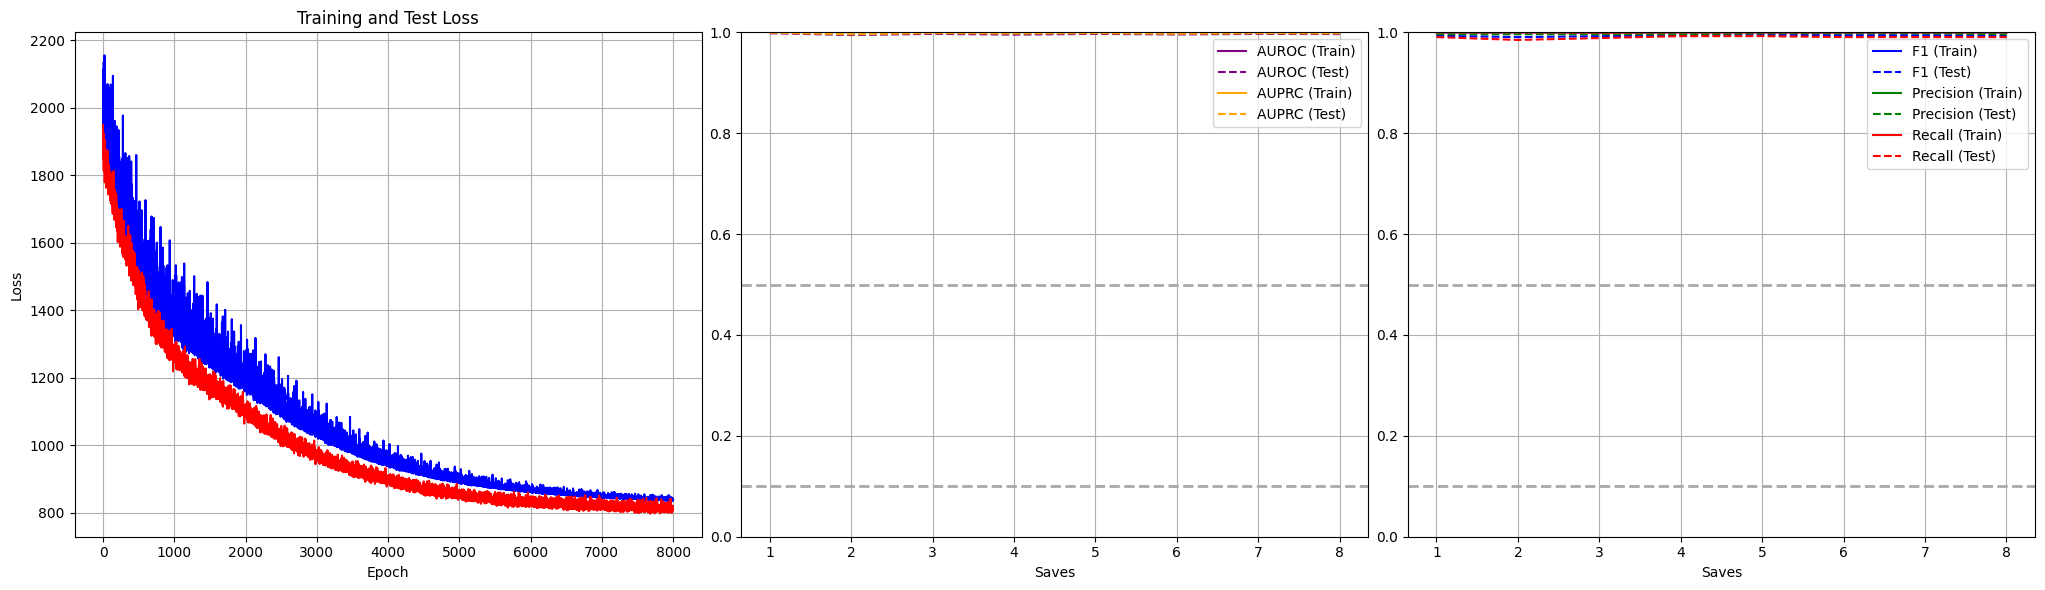

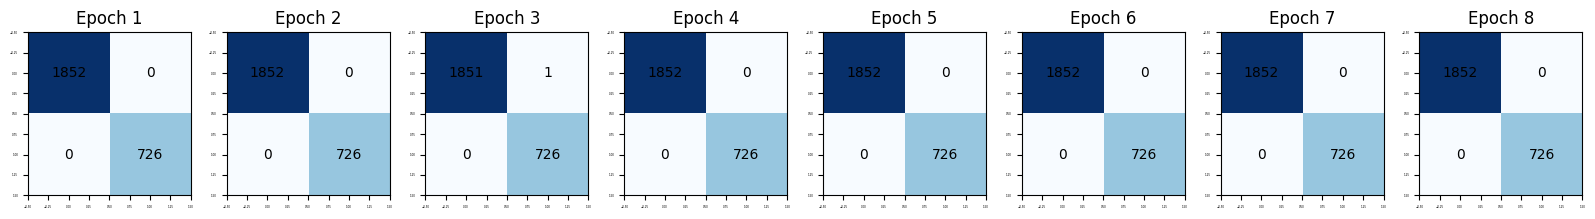

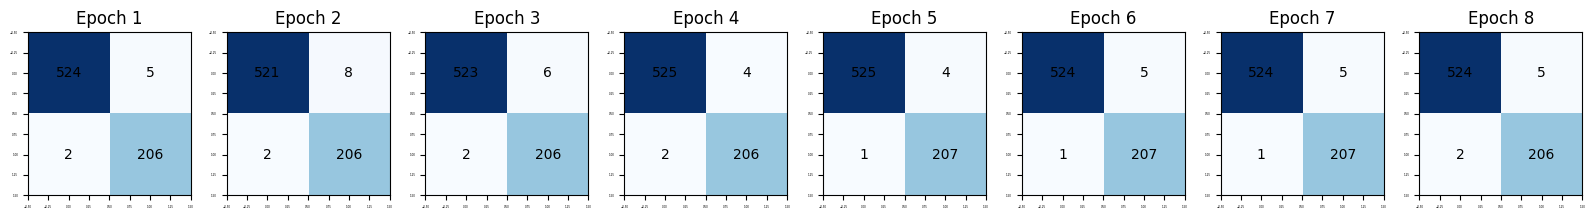

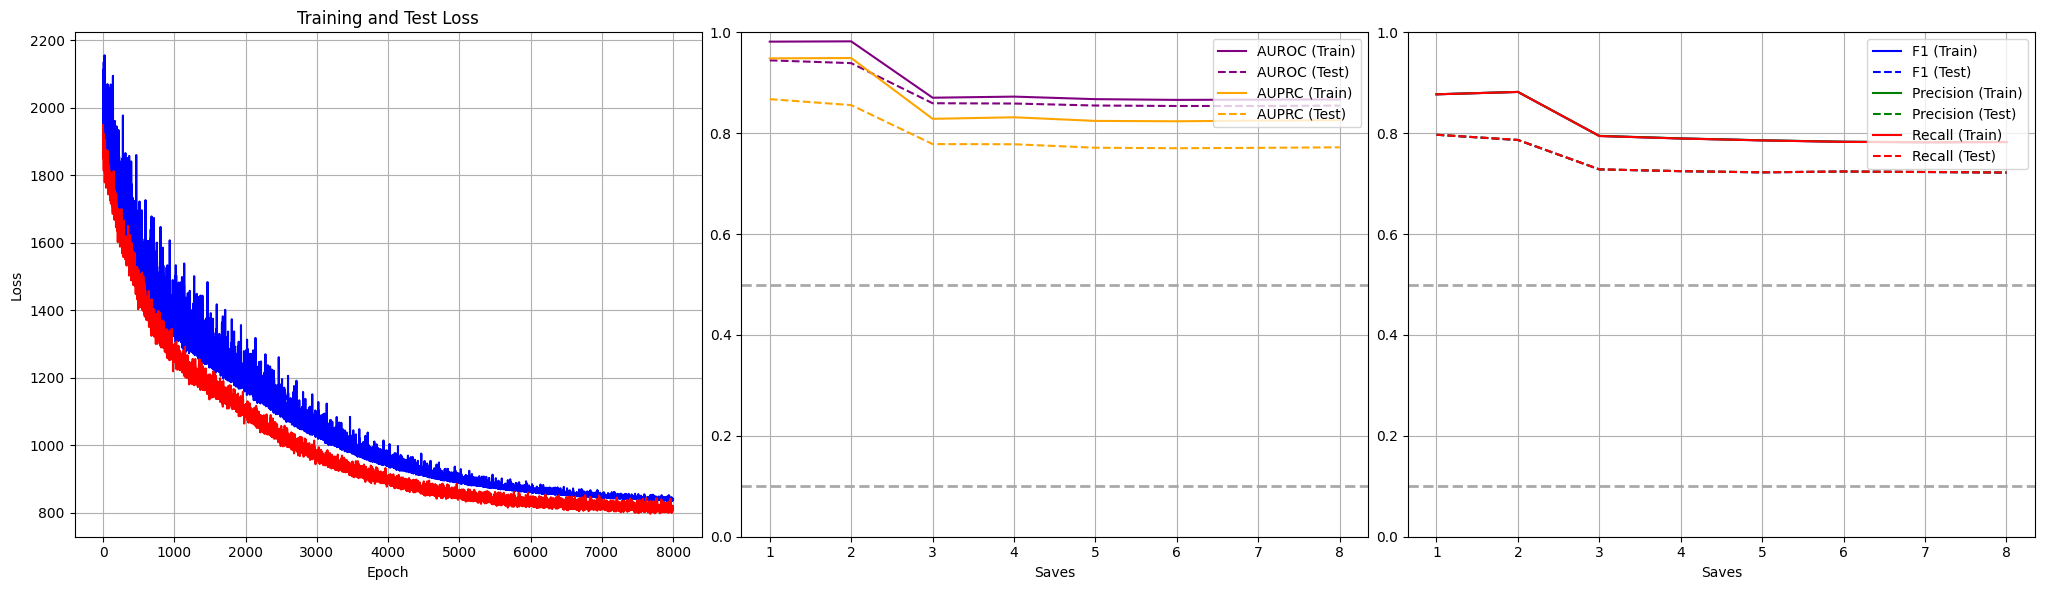

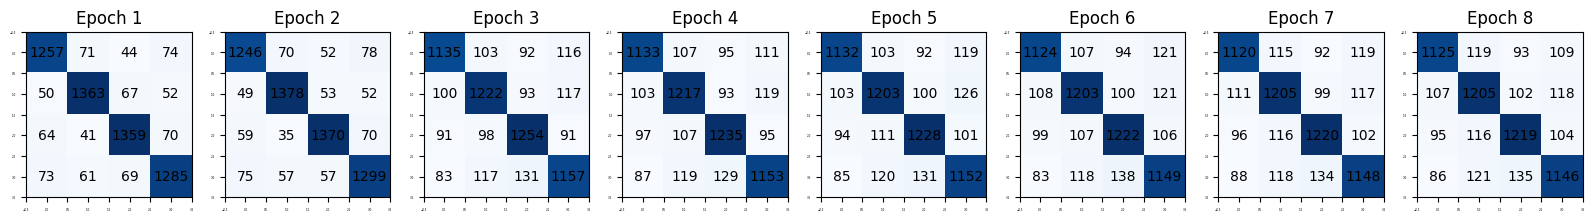

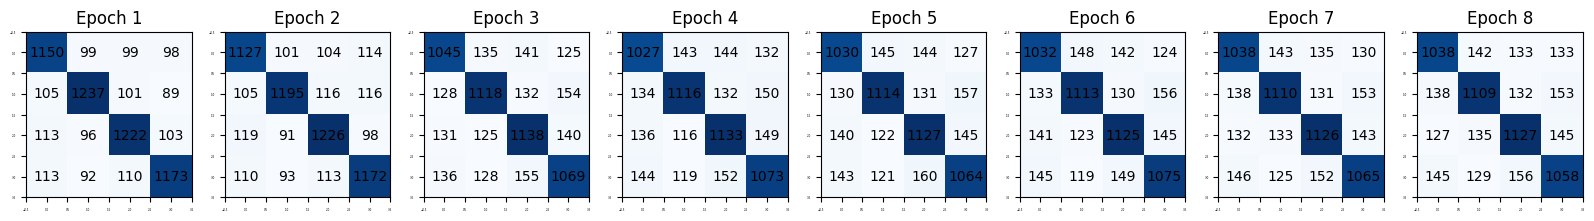

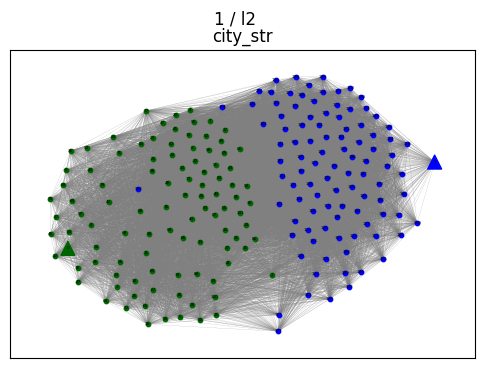

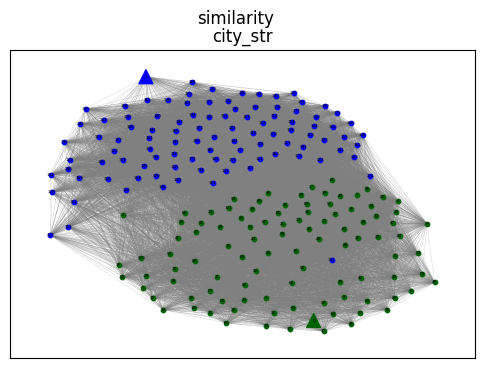

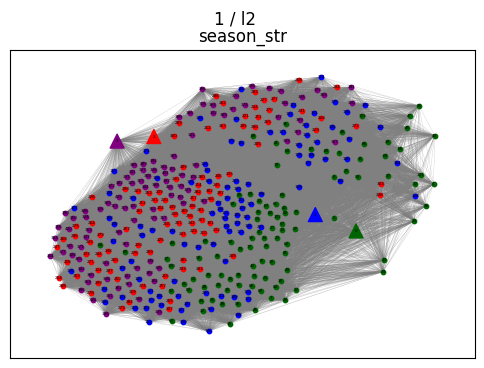

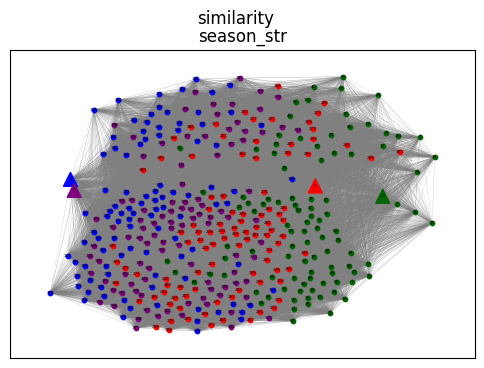

Error plot network embedding for year_str


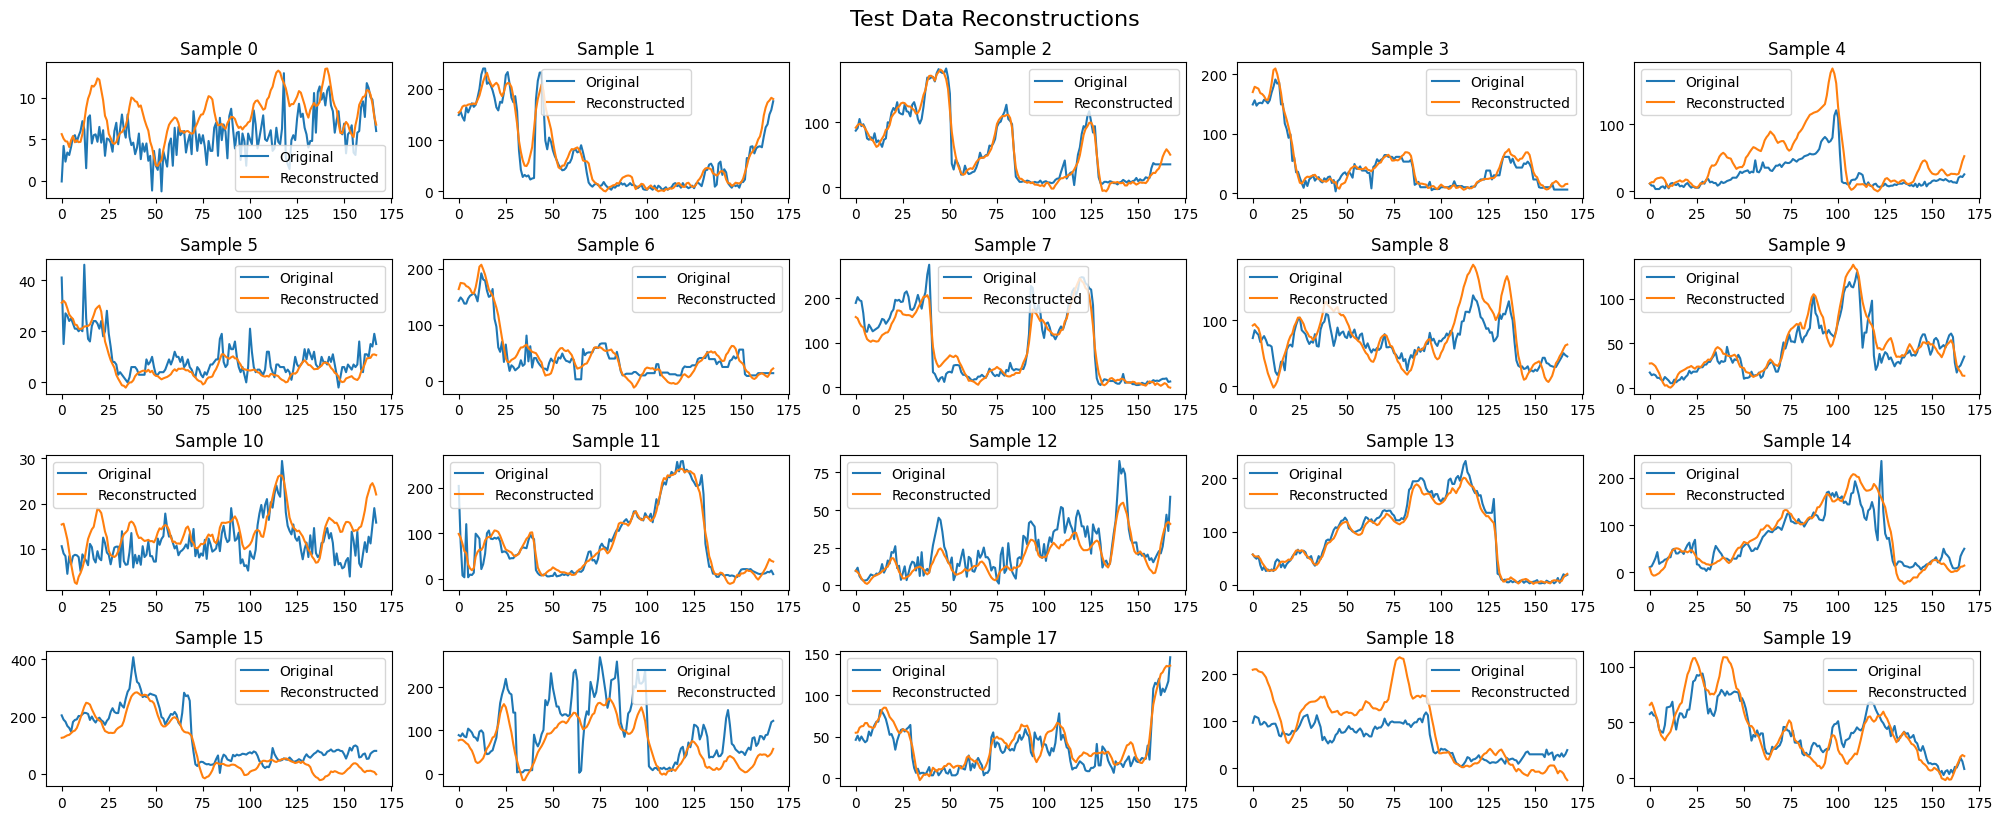

In [5]:
# overwrite = False
with open('run/train.py', 'r') as file:
    exec(file.read())


# Generation

1    This is air quality in Beijing.
Name: city_str, dtype: object


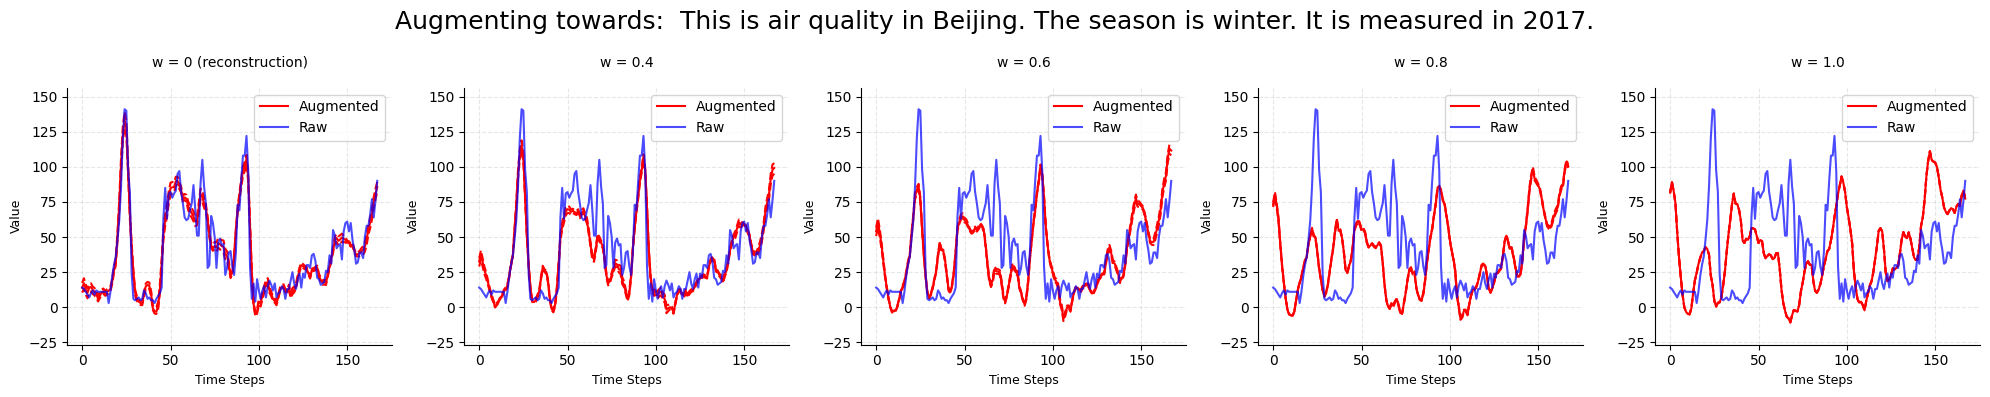

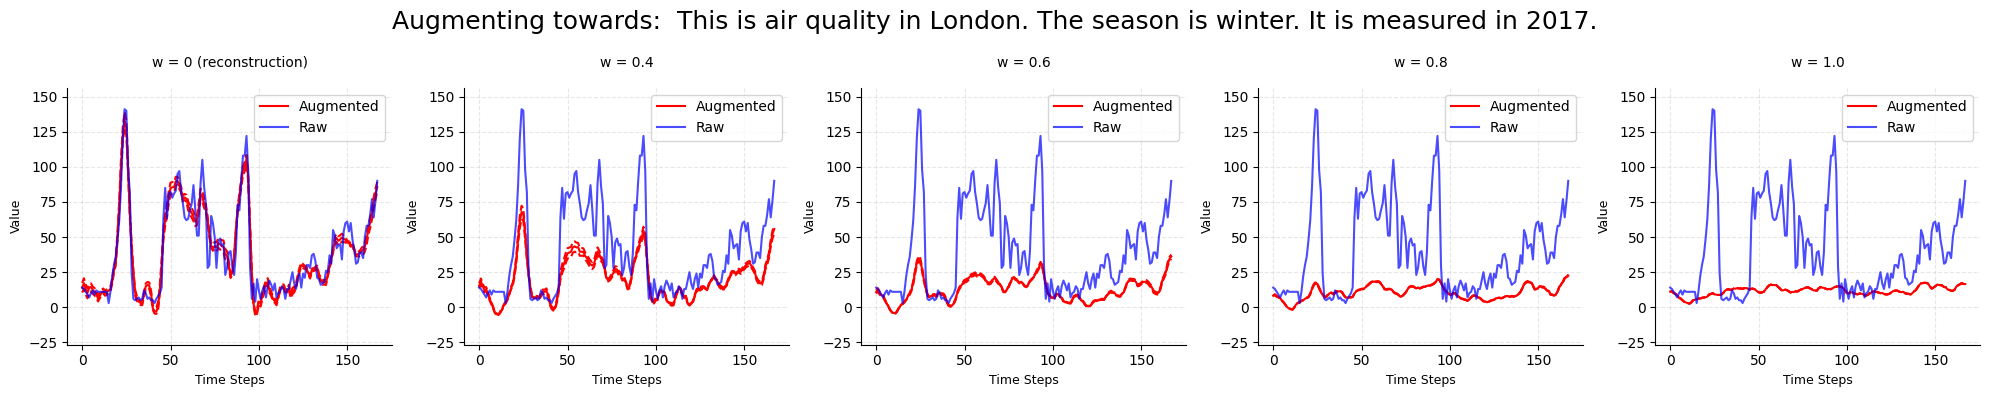

1    This is air quality in London.
Name: city_str, dtype: object


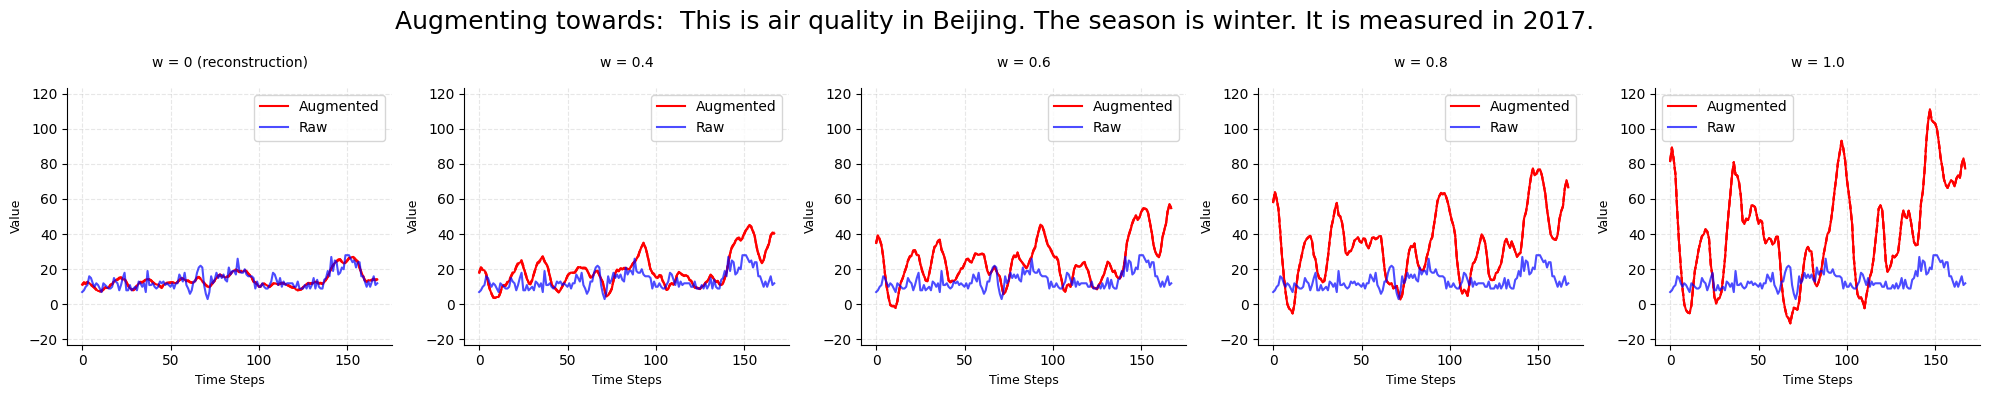

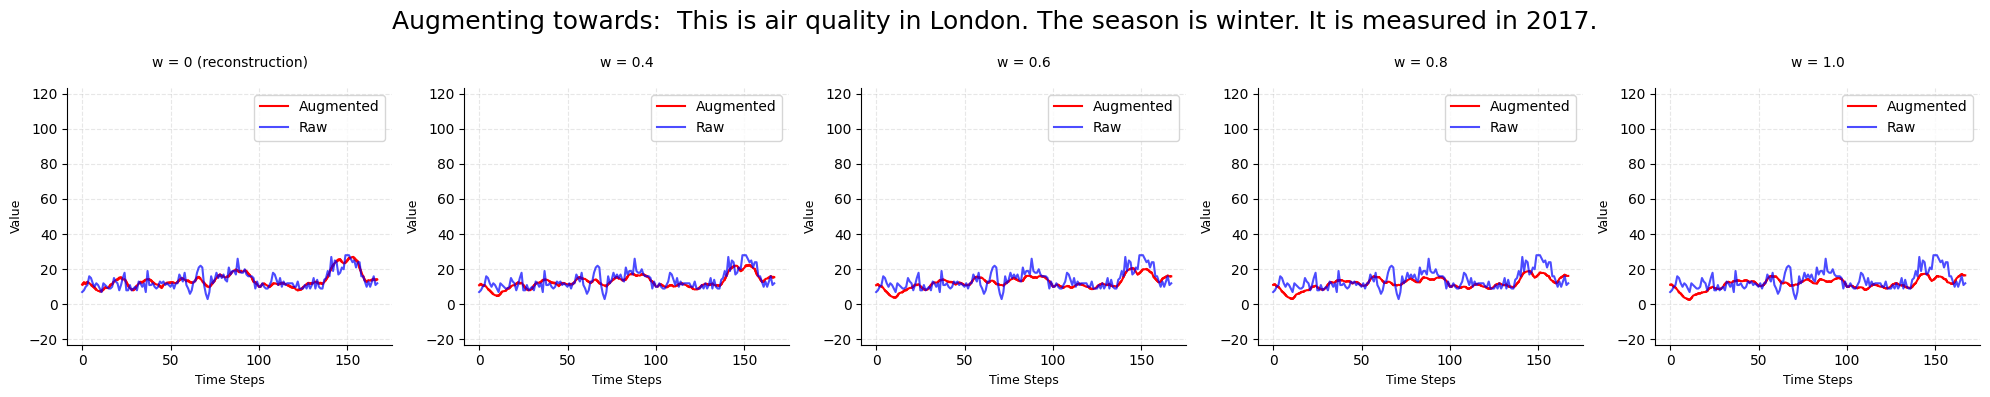

1    The season is winter.
Name: season_str, dtype: object


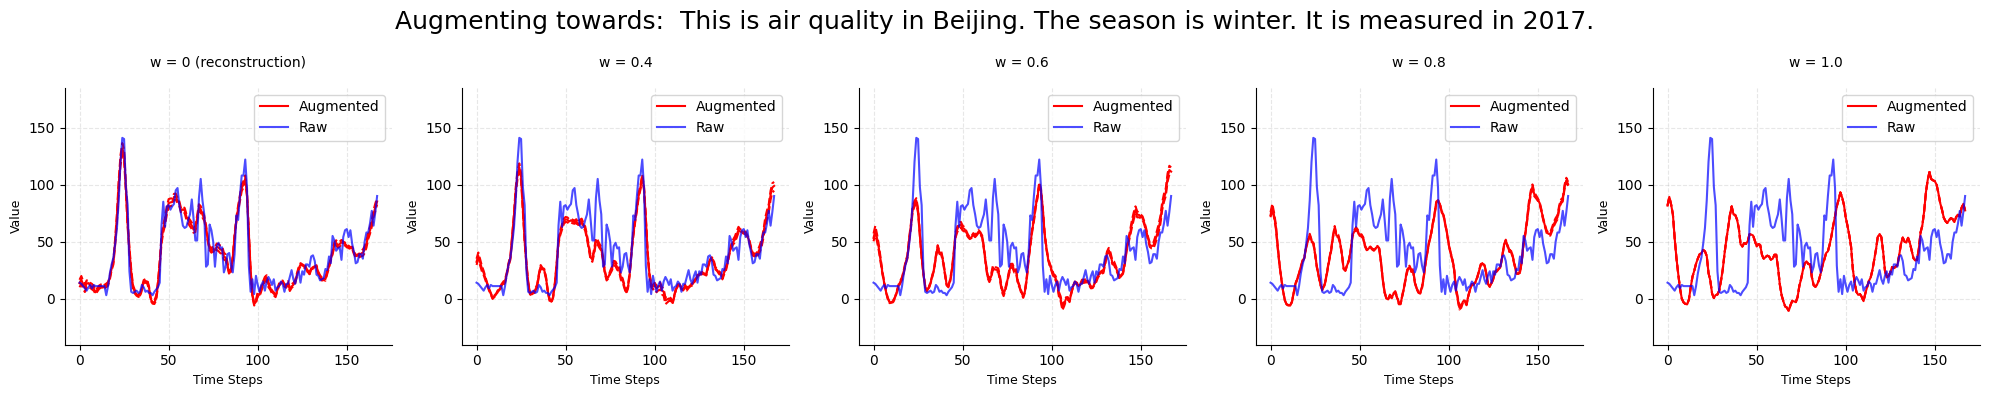

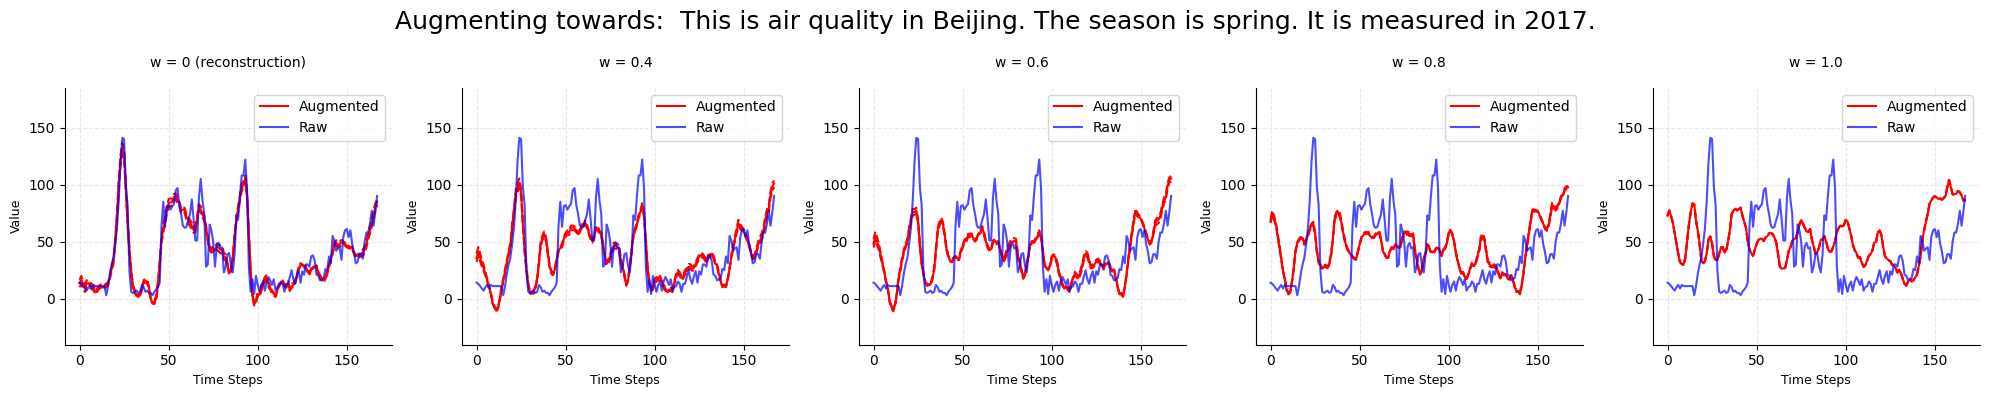

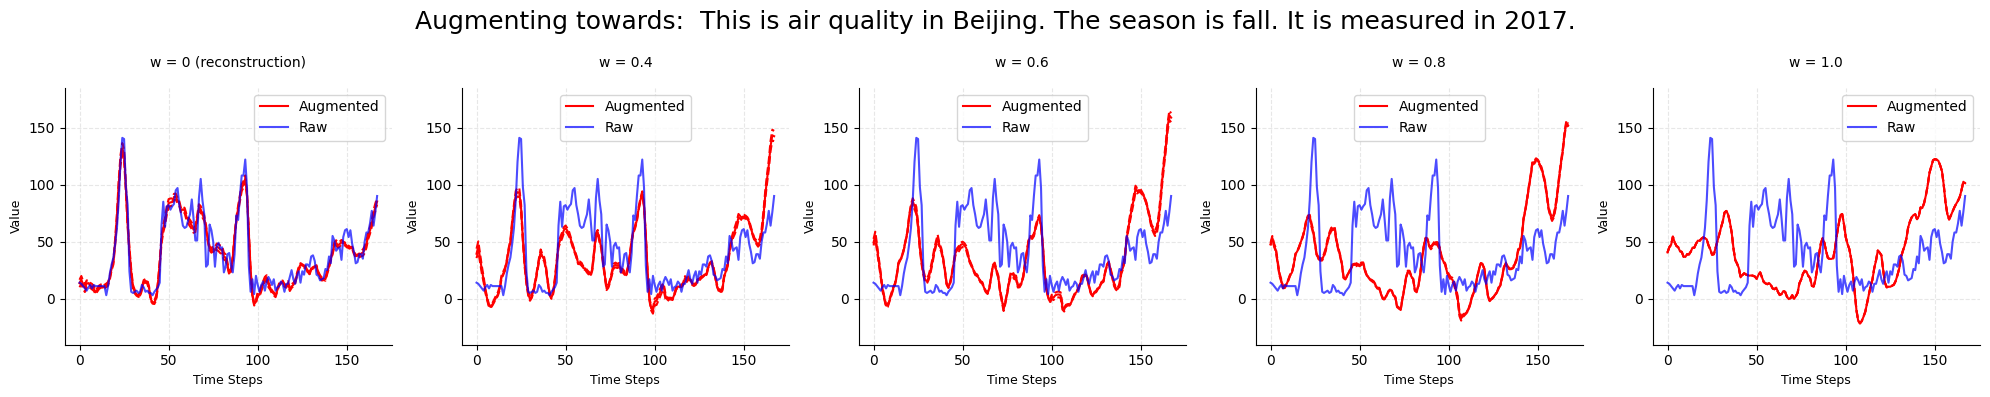

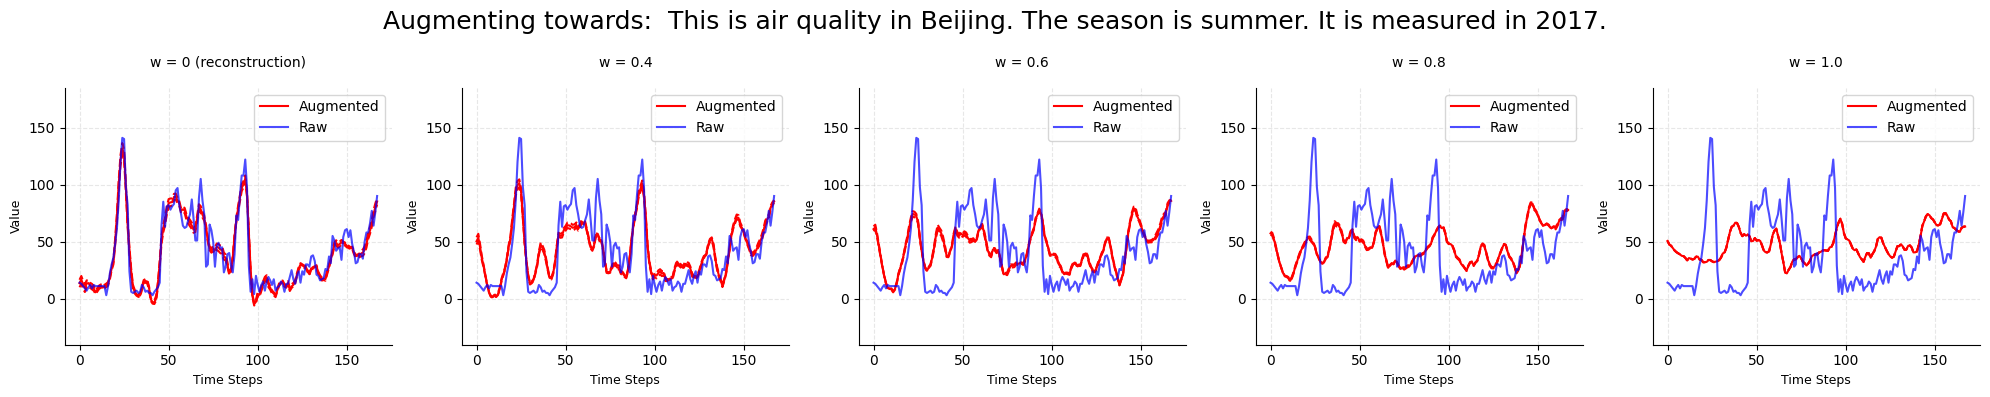

1    The season is spring.
Name: season_str, dtype: object


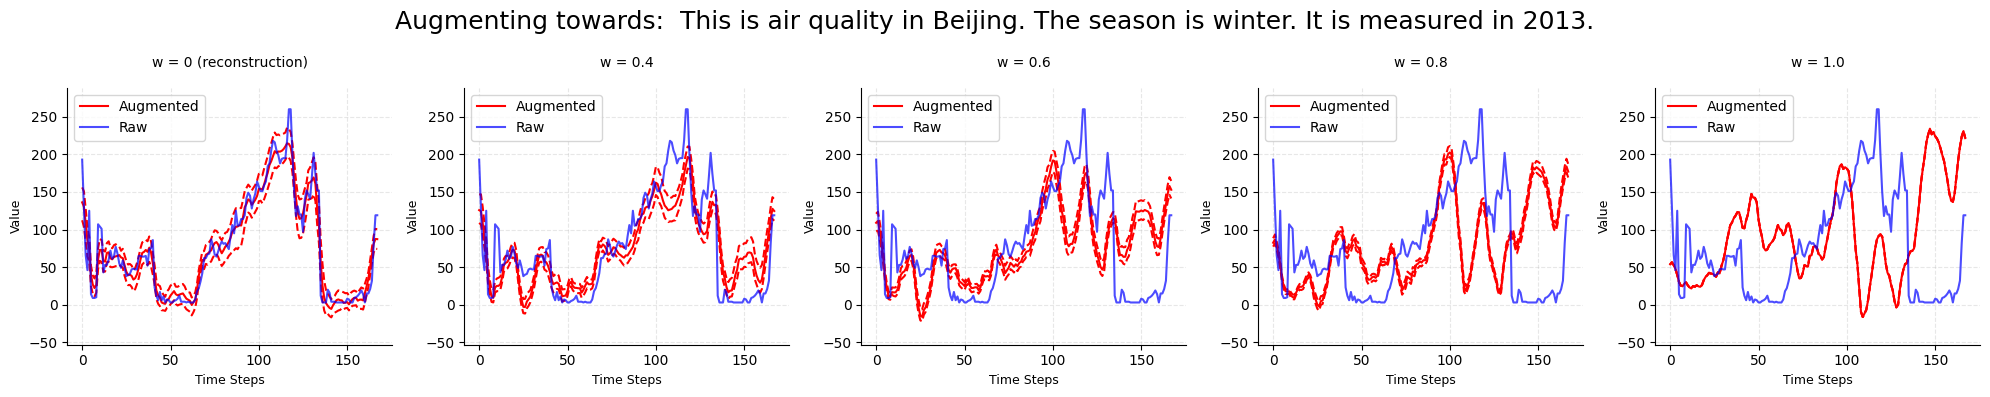

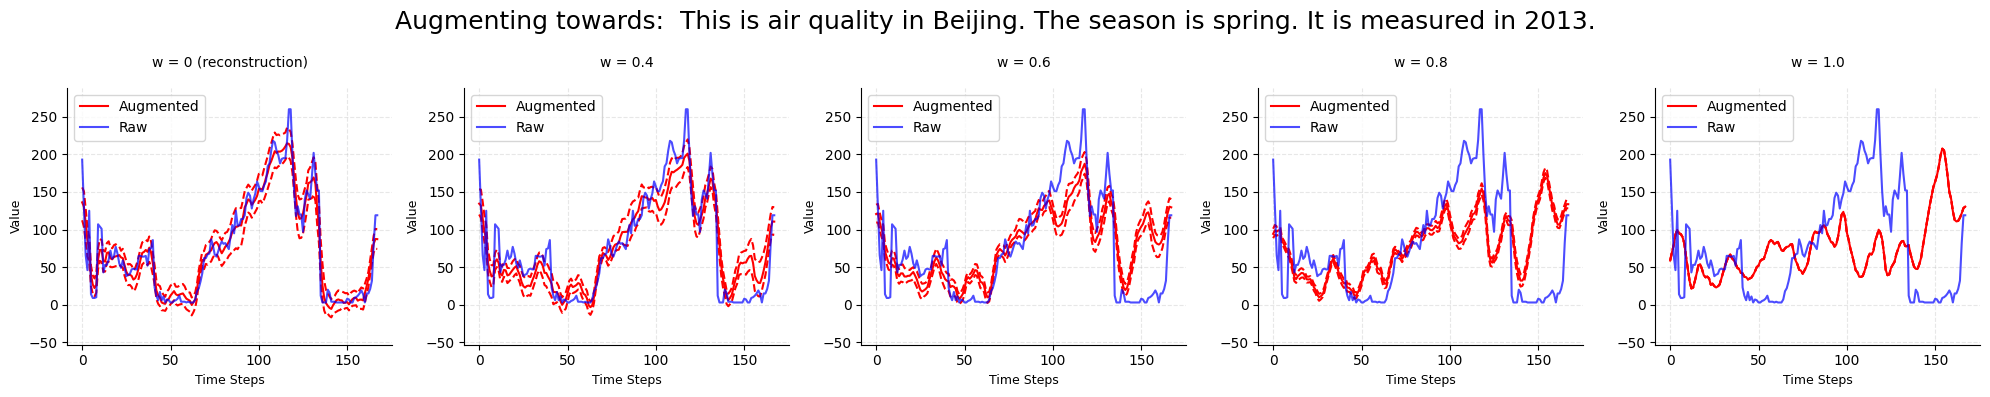

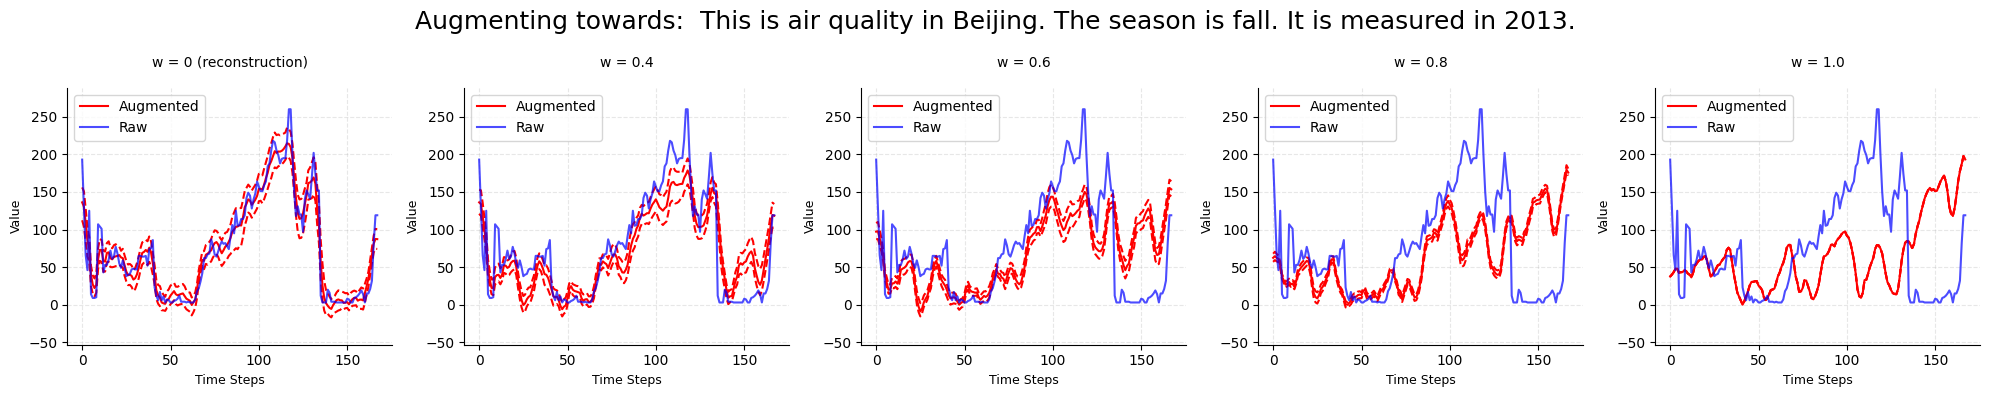

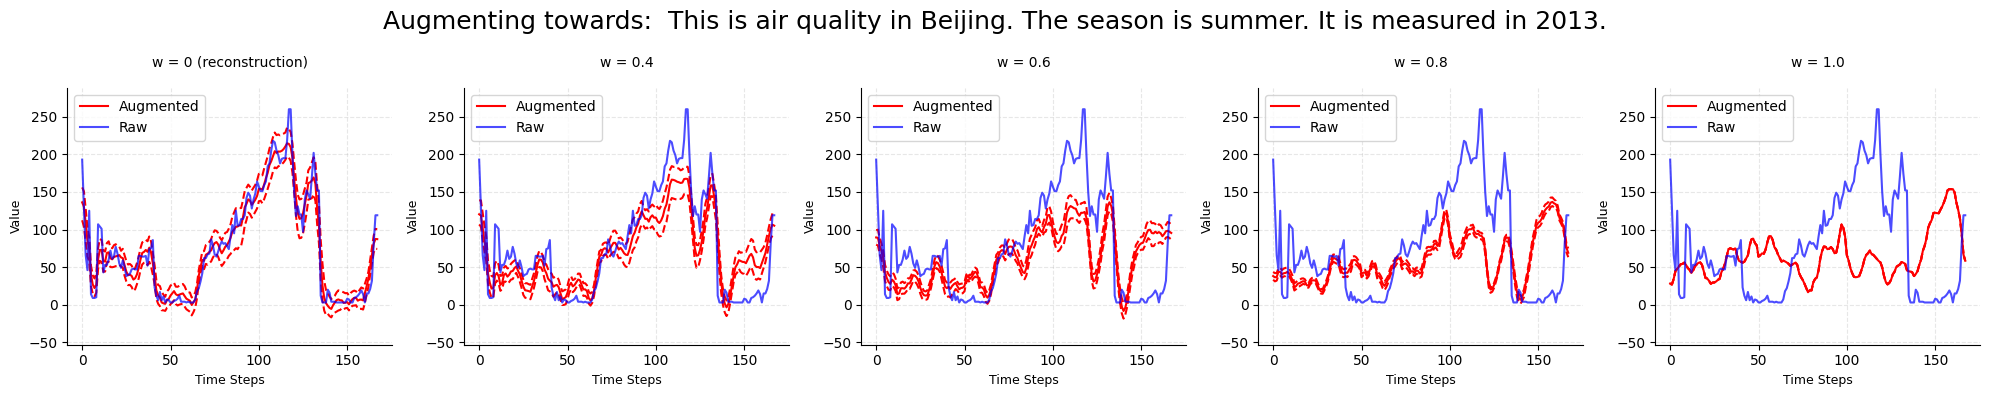

1    The season is fall.
Name: season_str, dtype: object


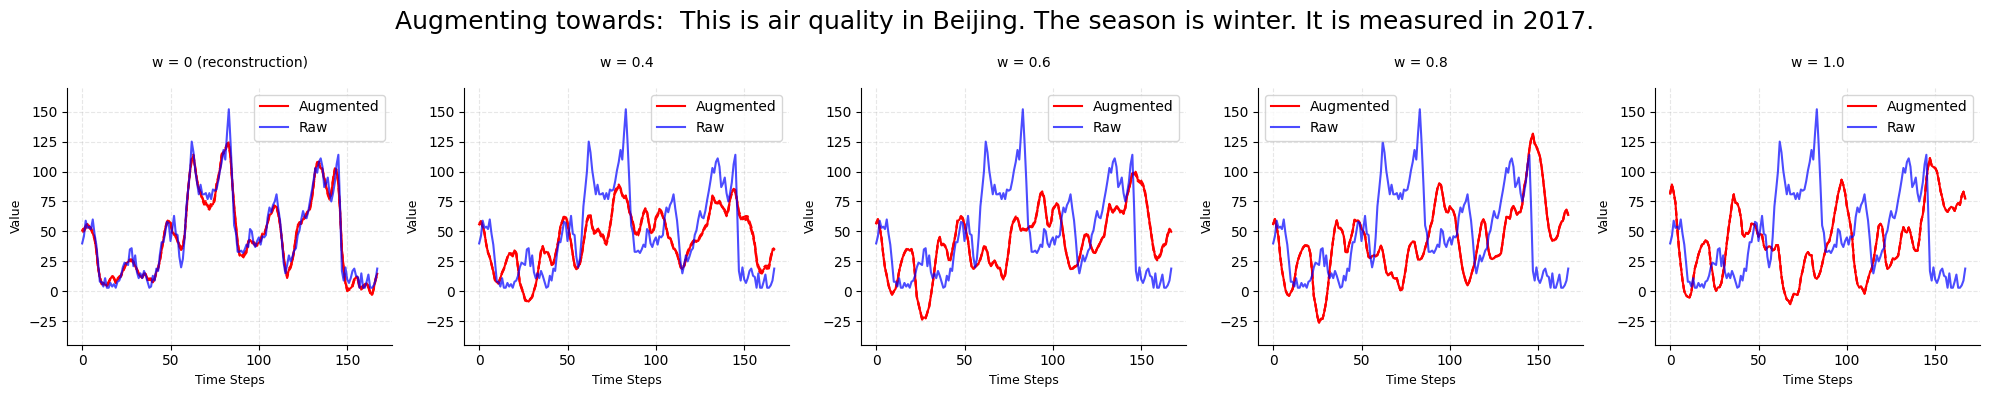

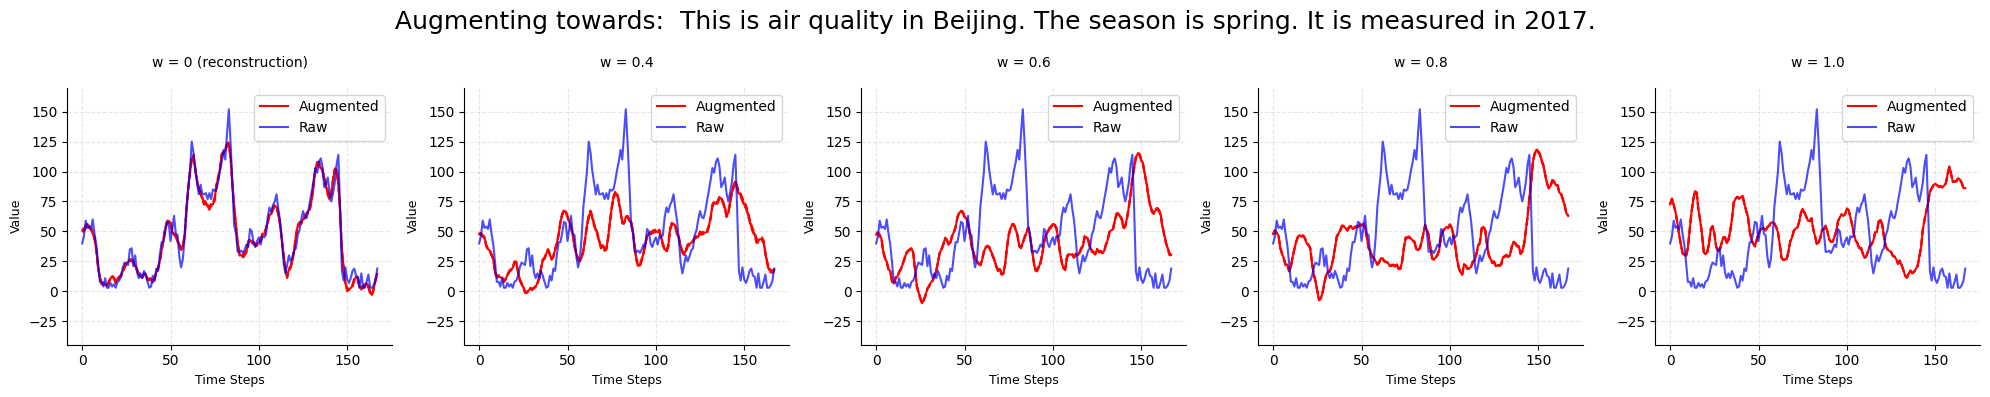

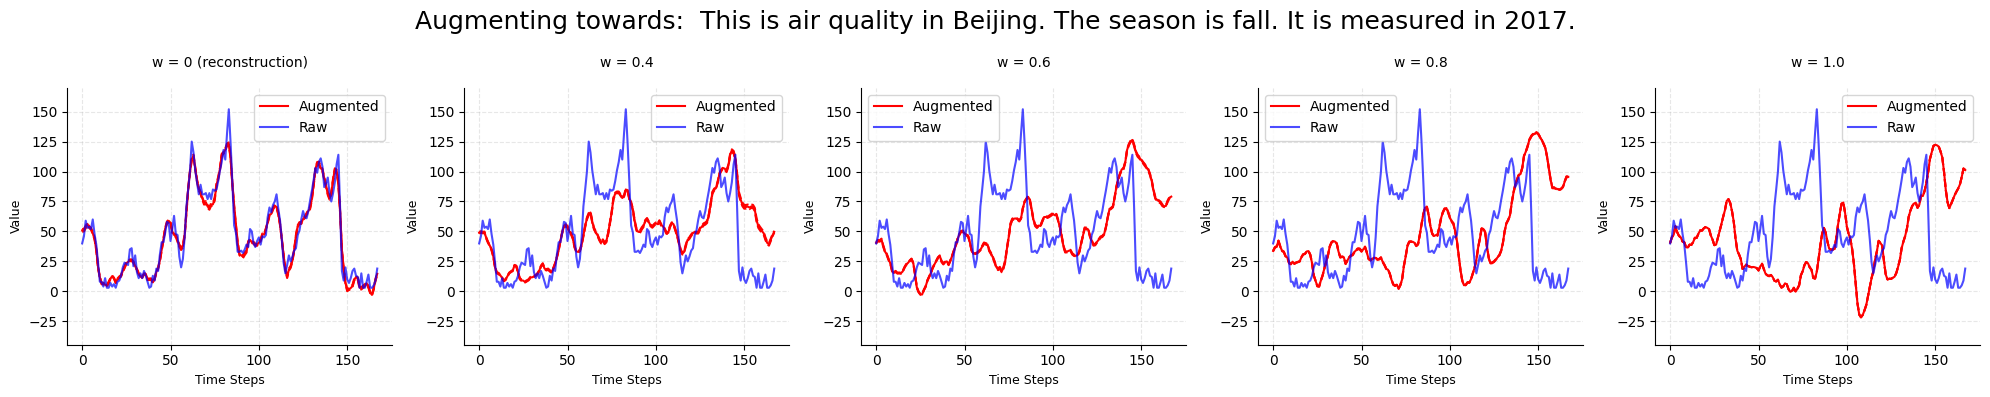

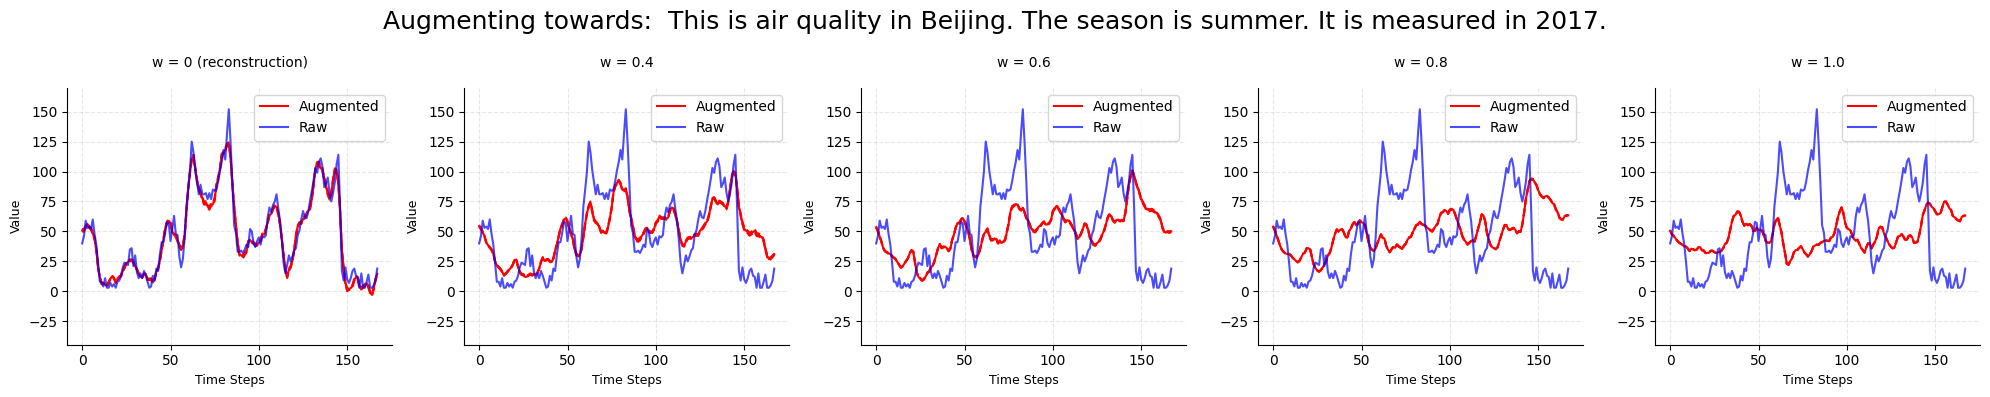

1    The season is summer.
Name: season_str, dtype: object


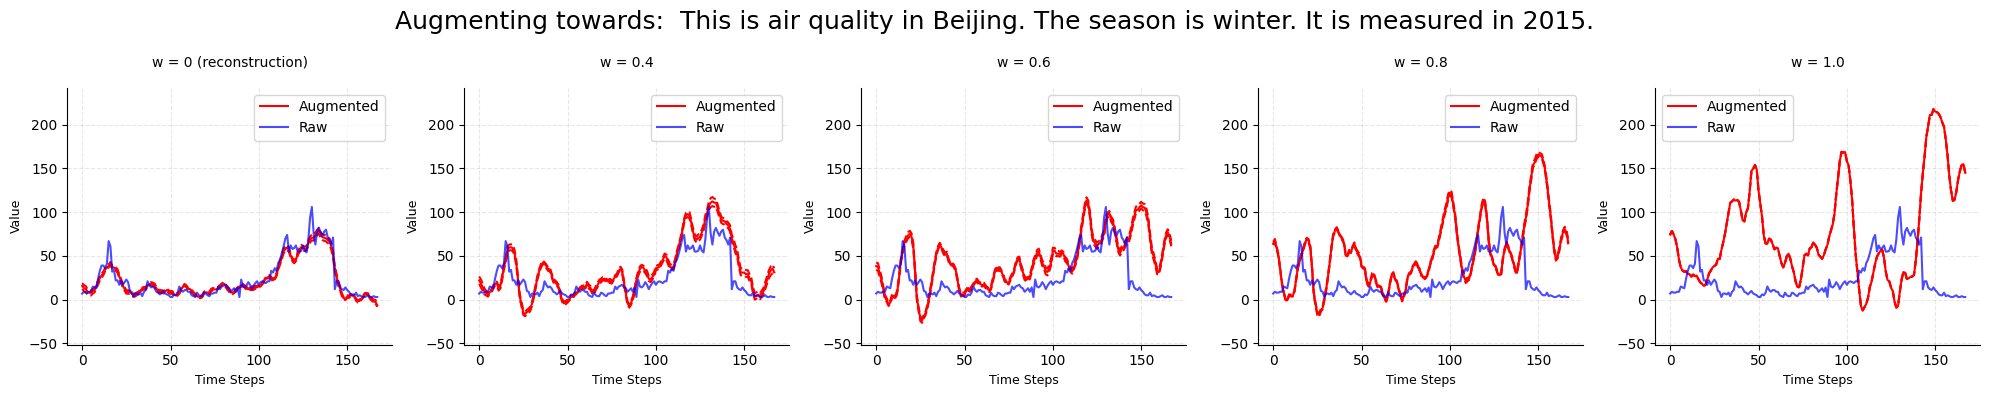

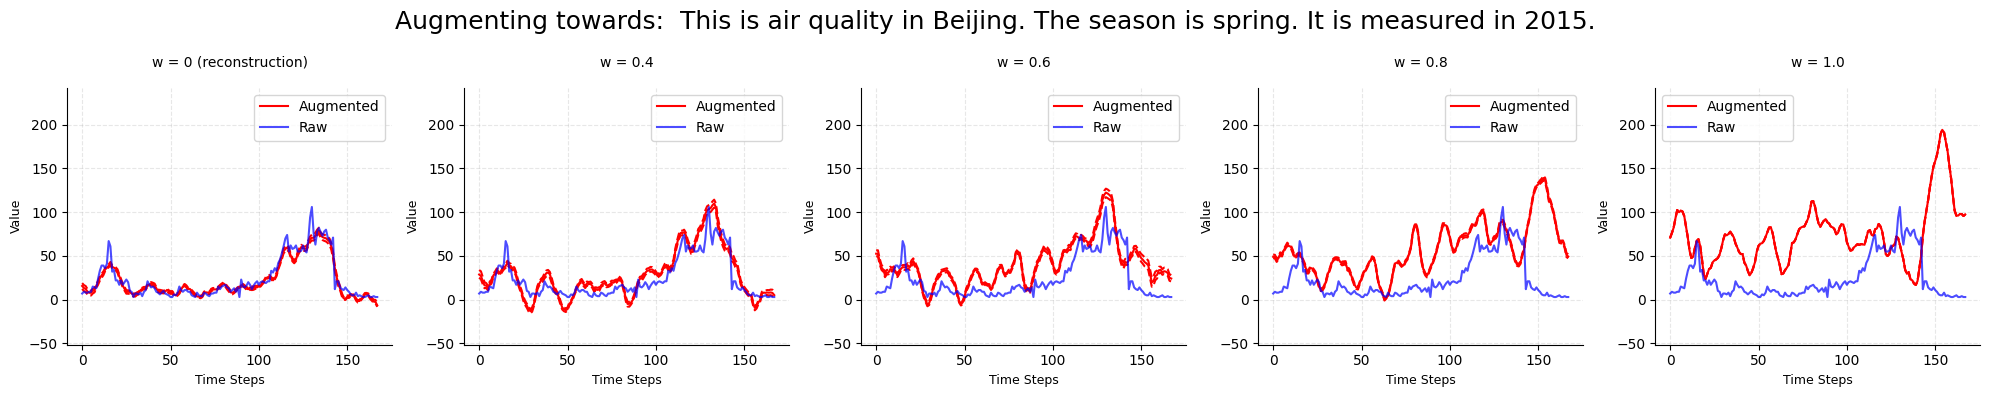

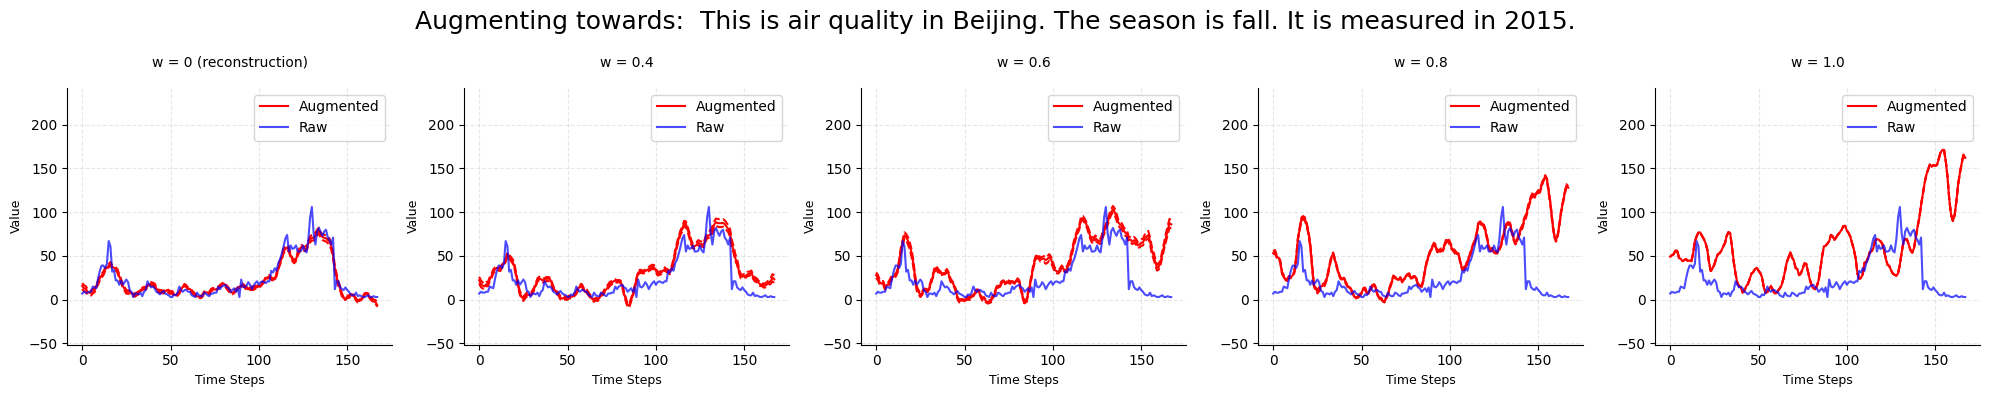

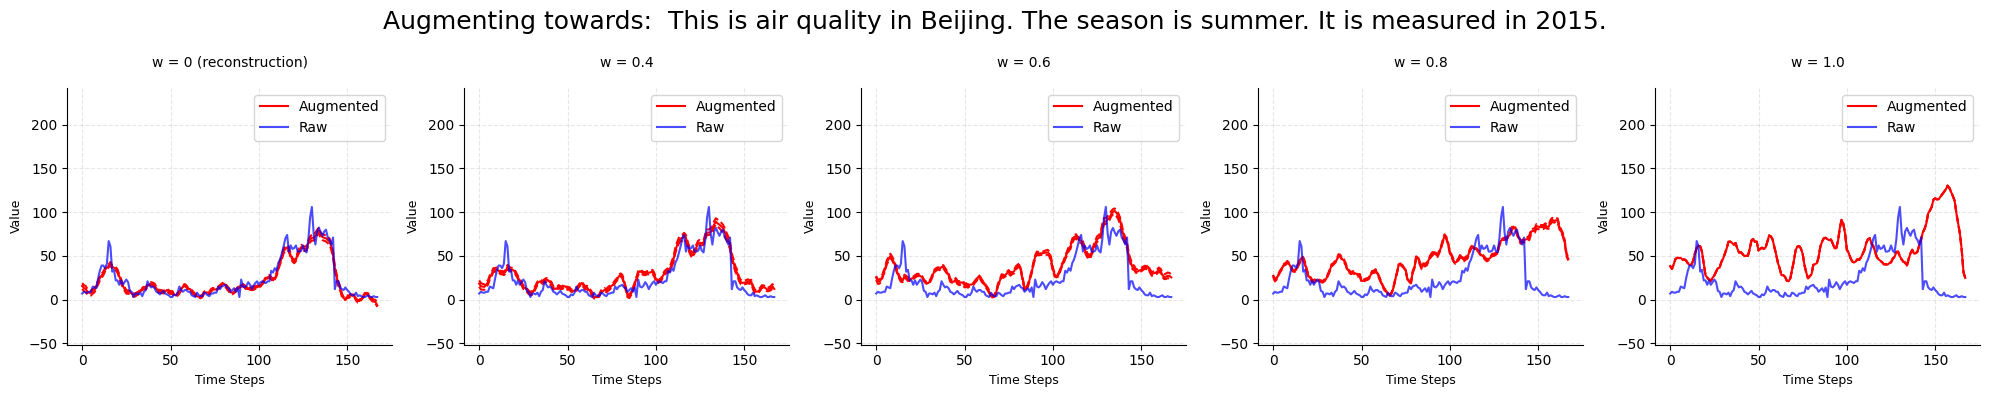

1    It is measured in 2014.
Name: year_str, dtype: object


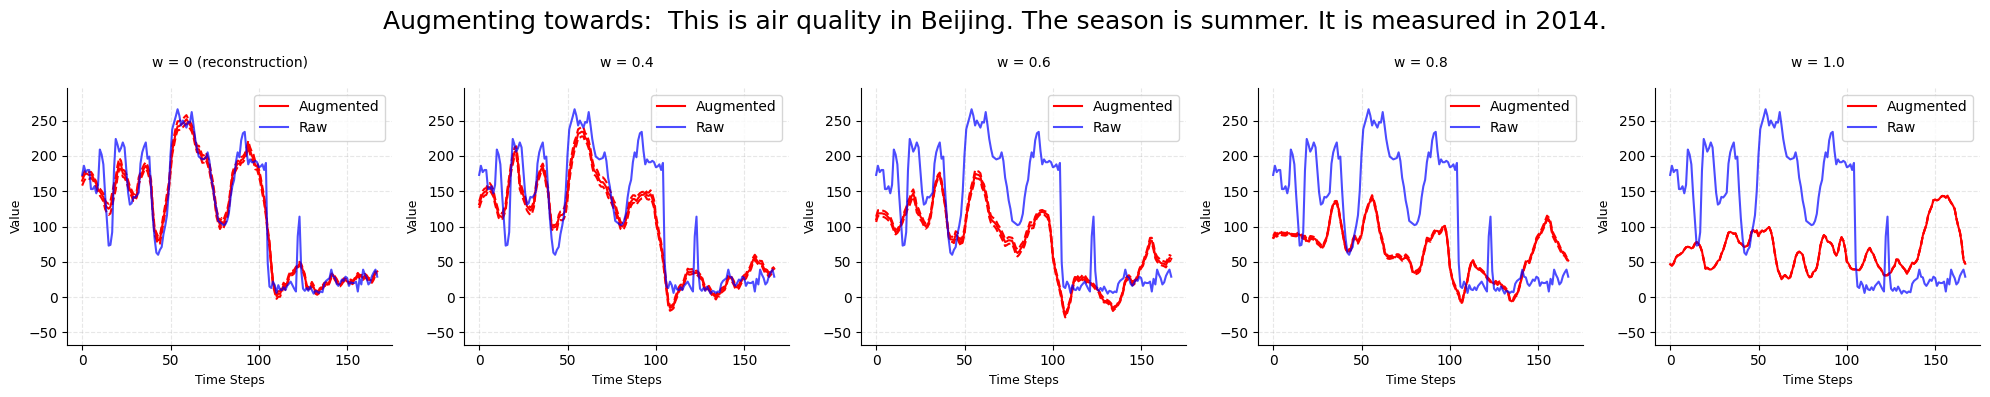

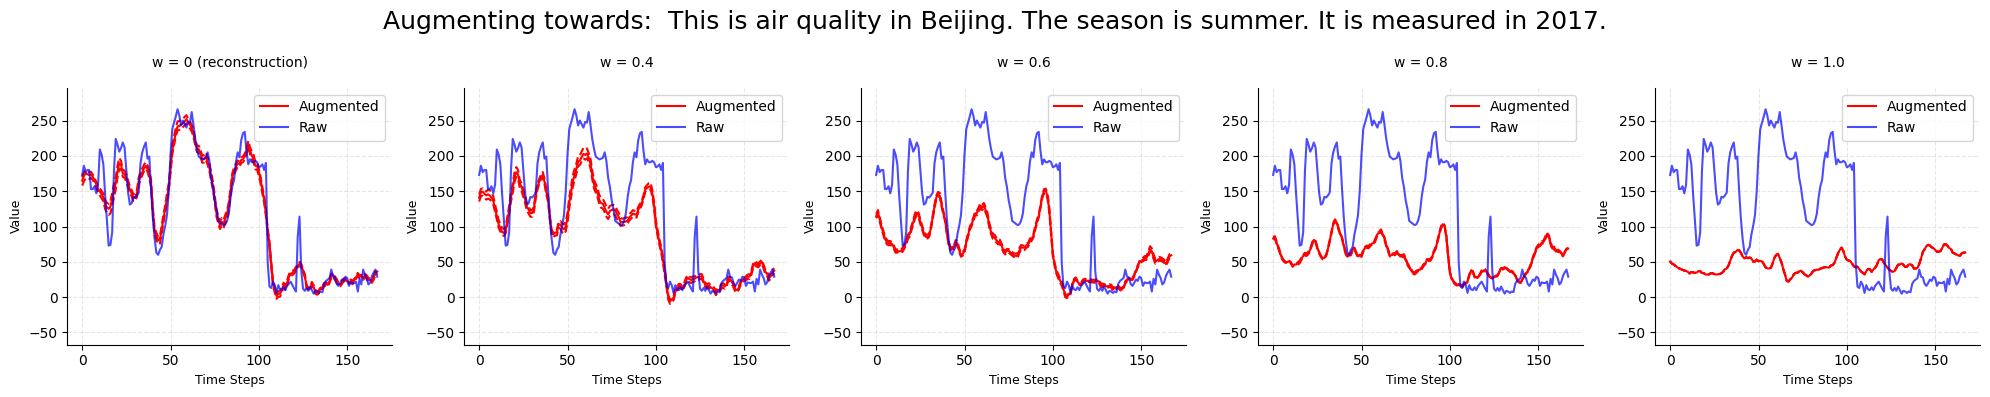

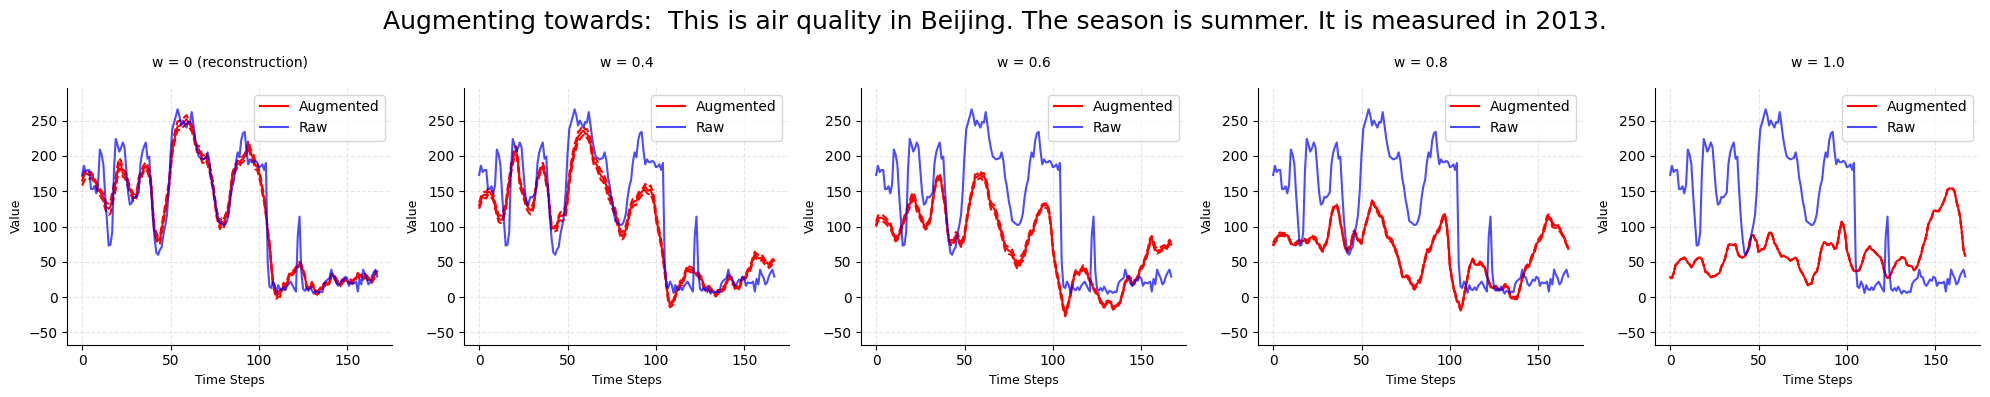

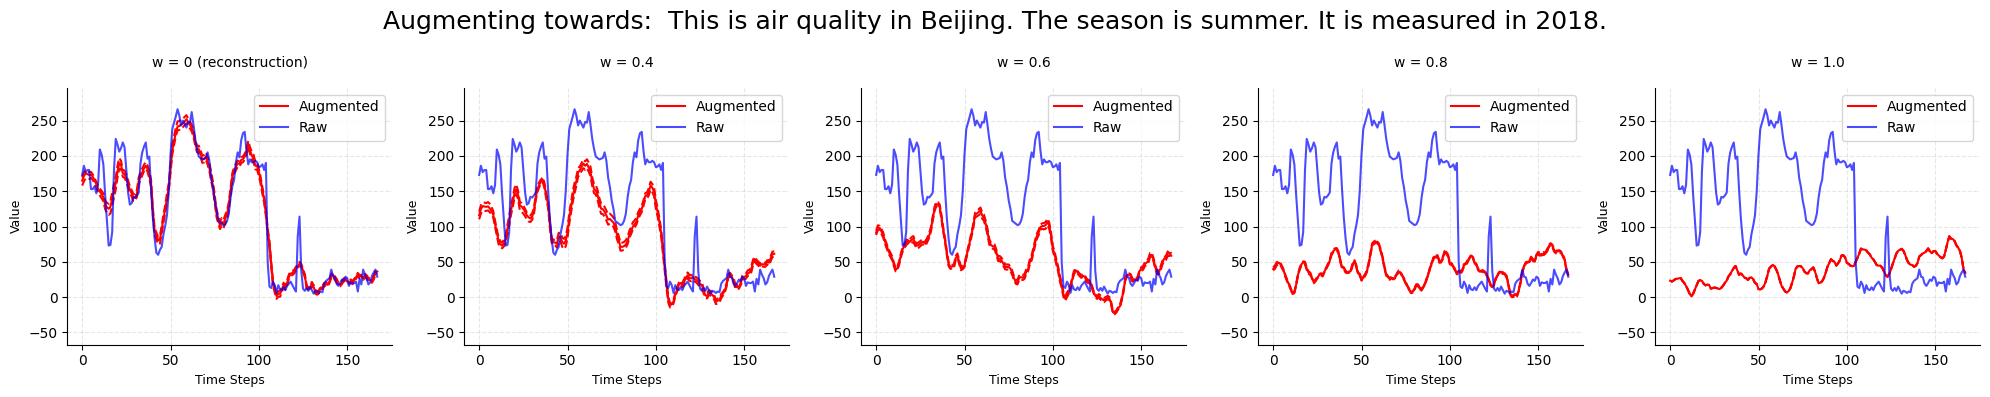

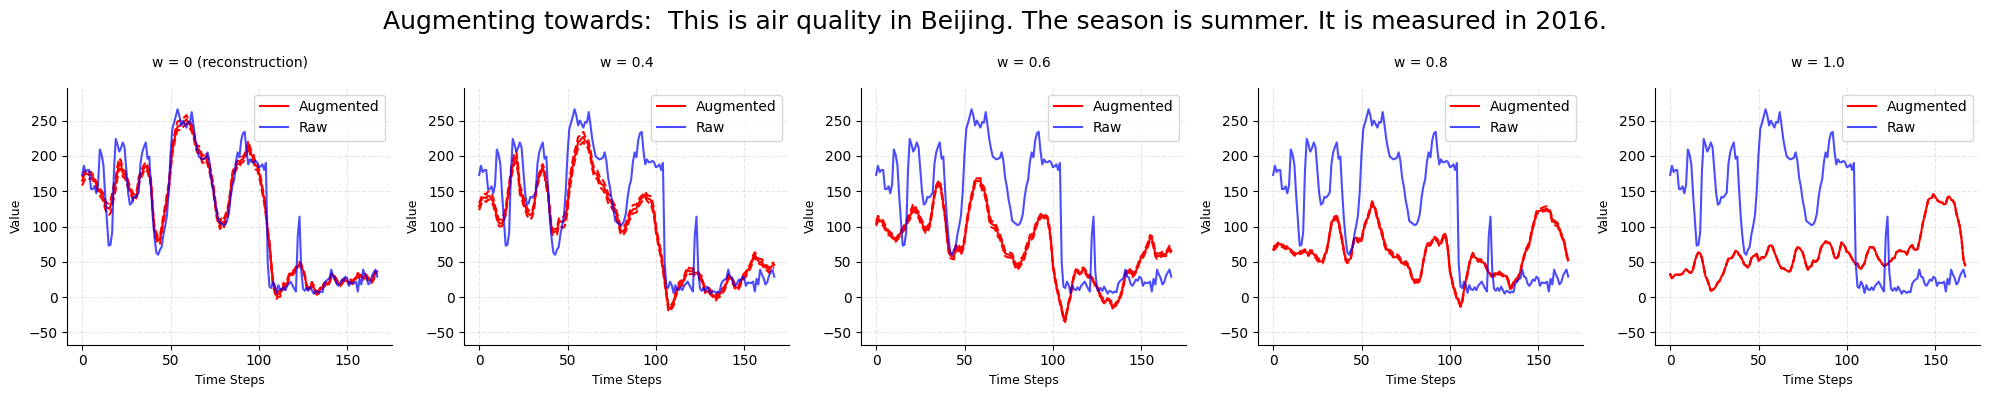

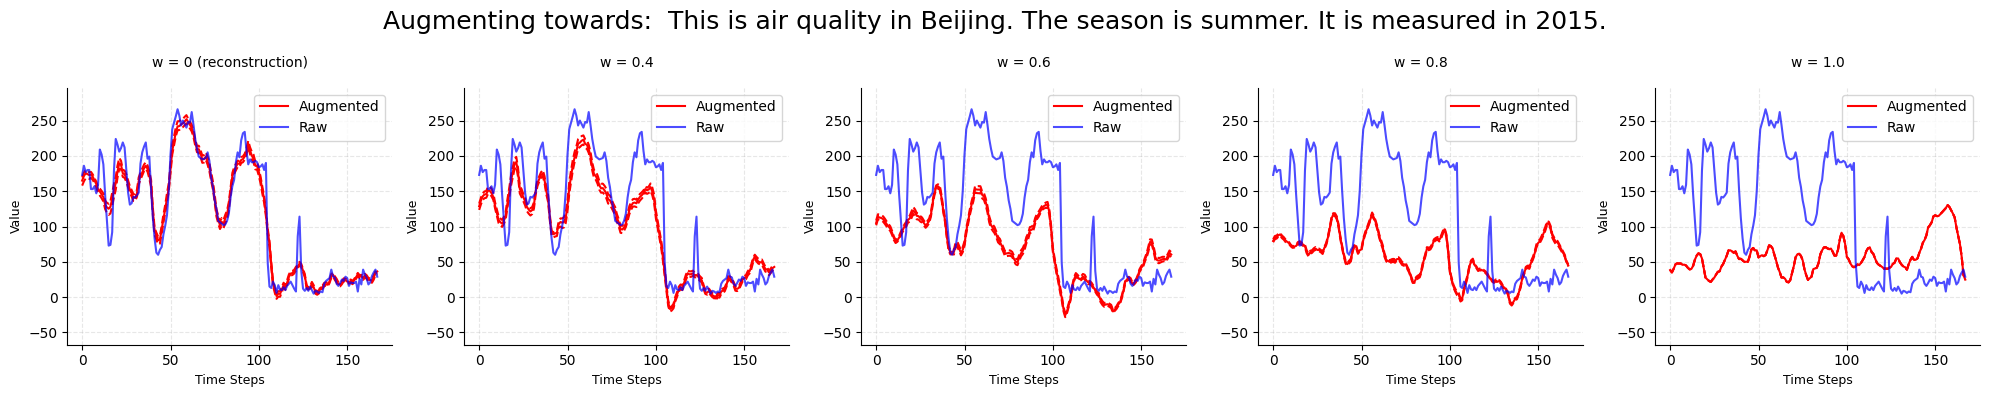

1    It is measured in 2017.
Name: year_str, dtype: object


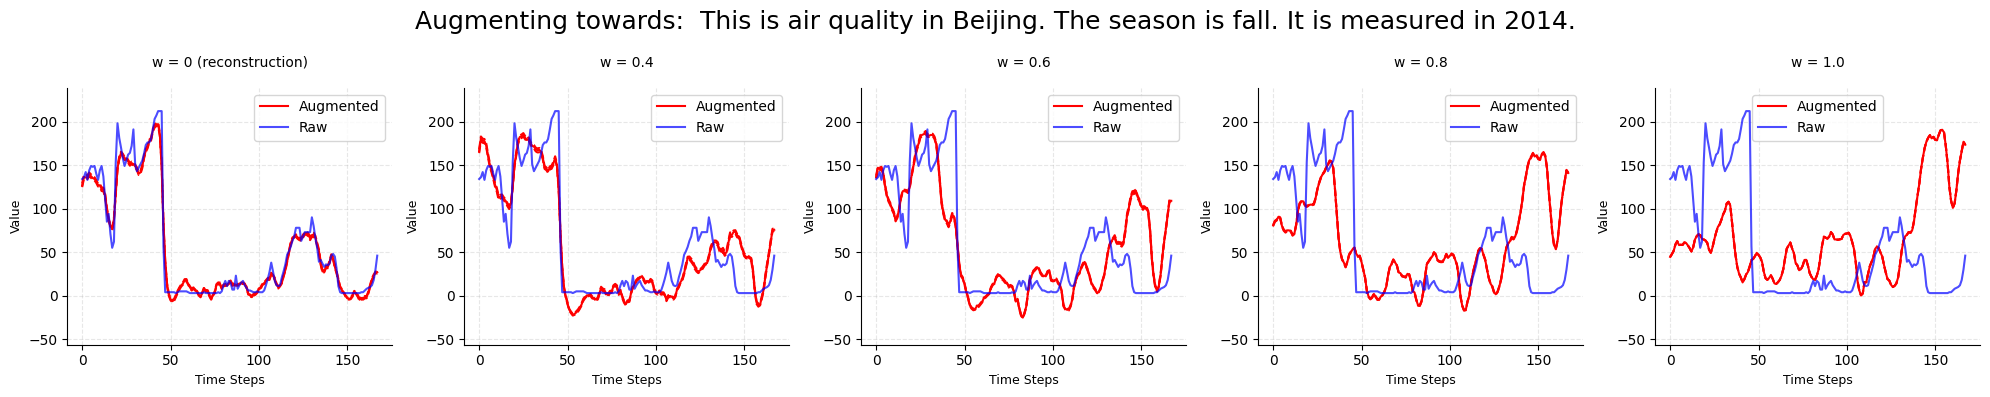

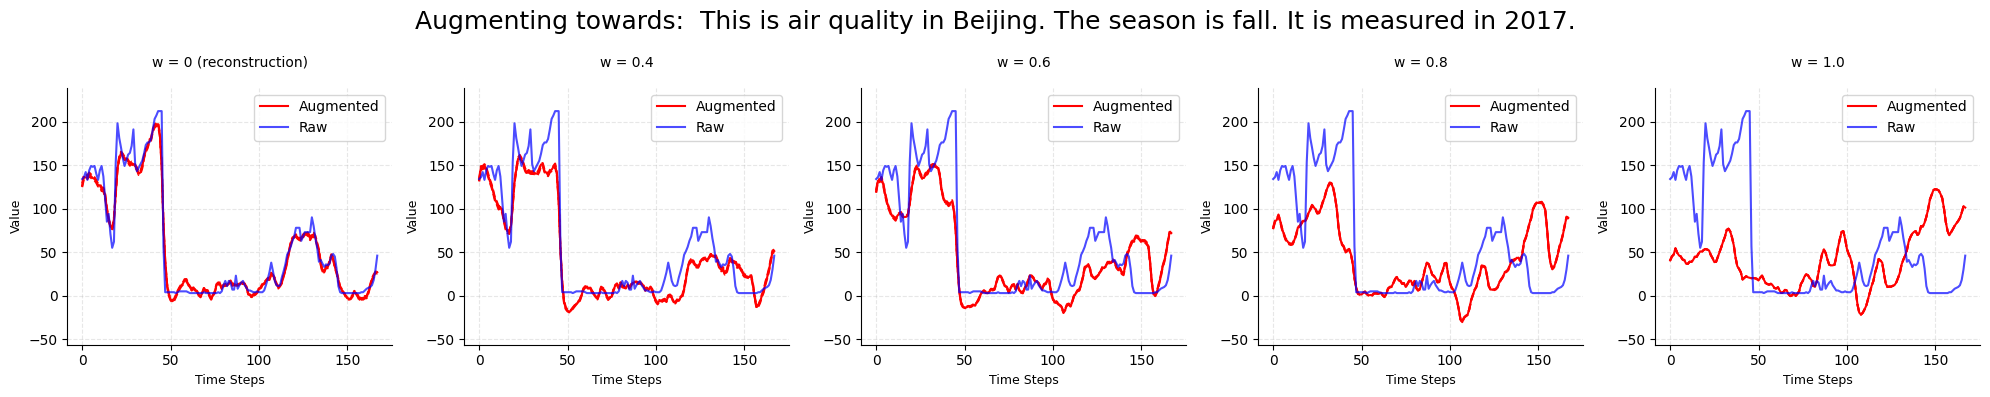

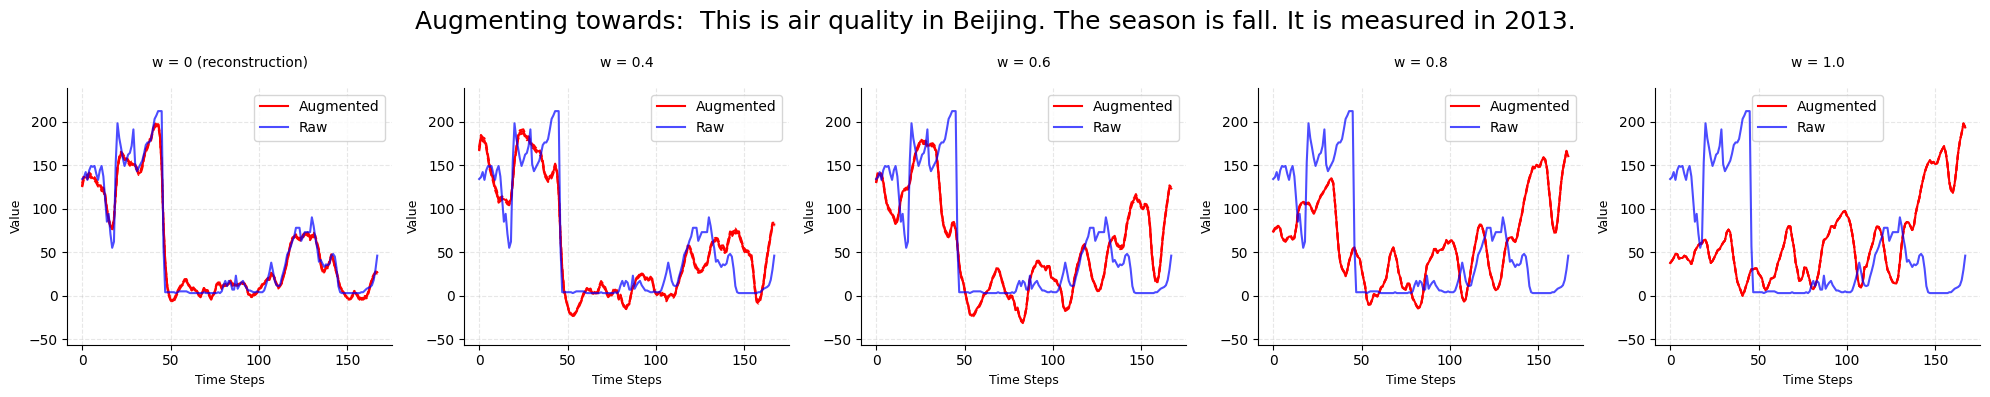

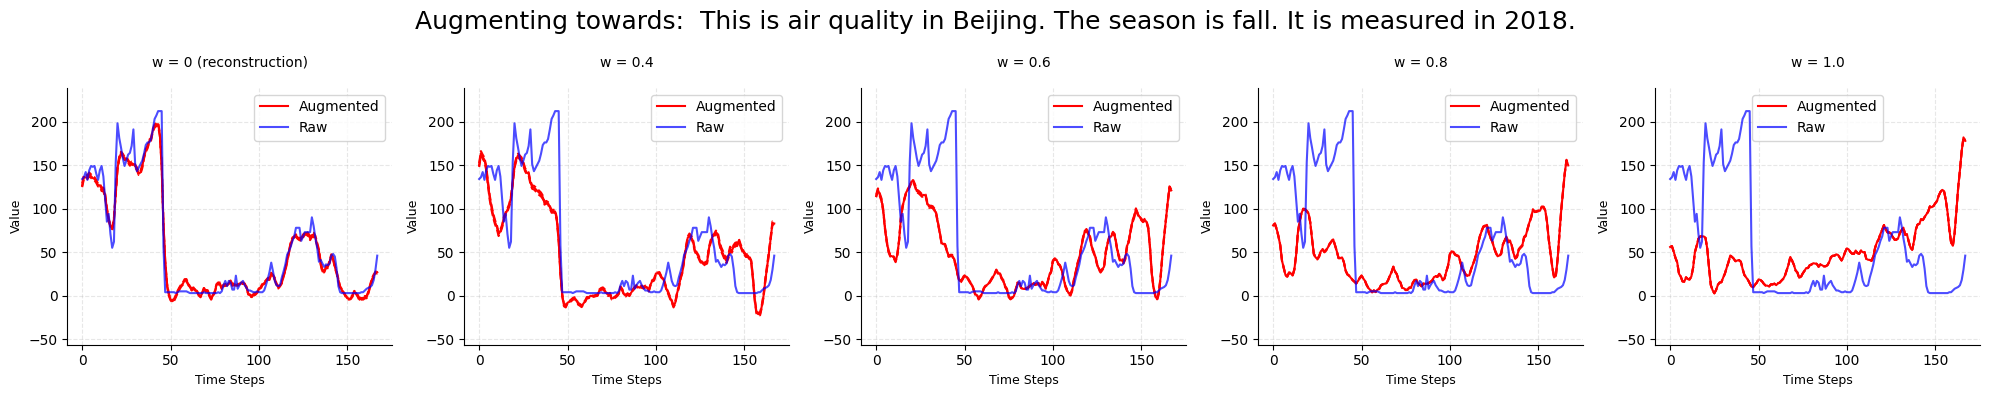

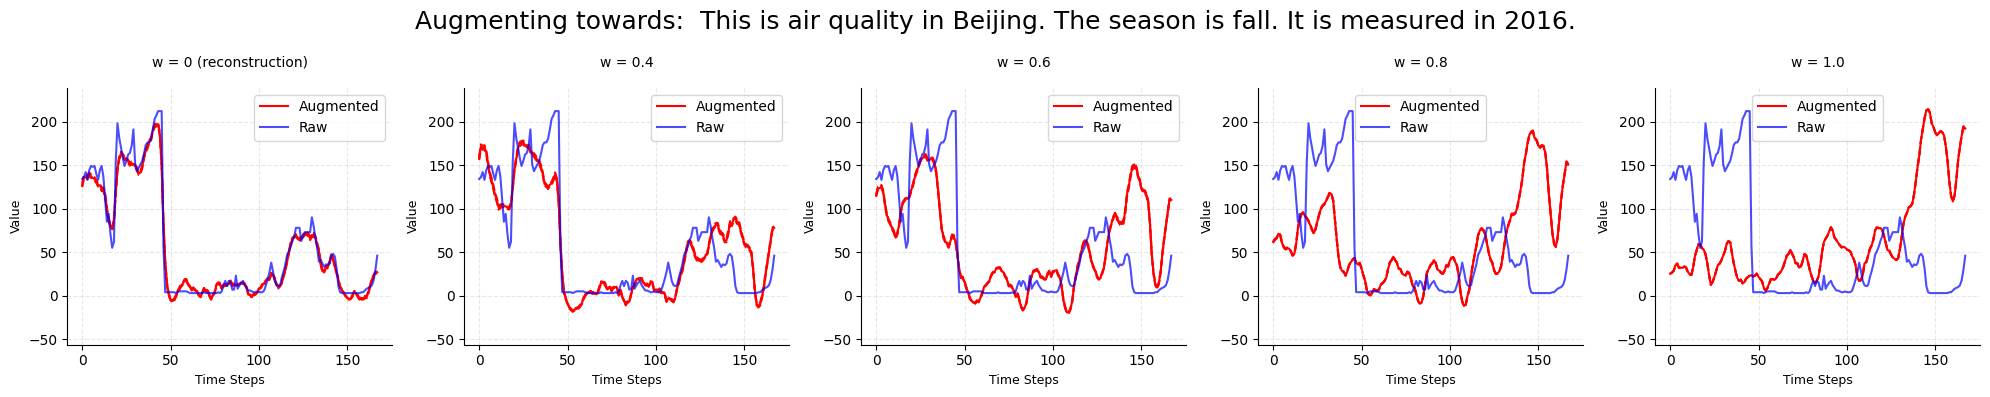

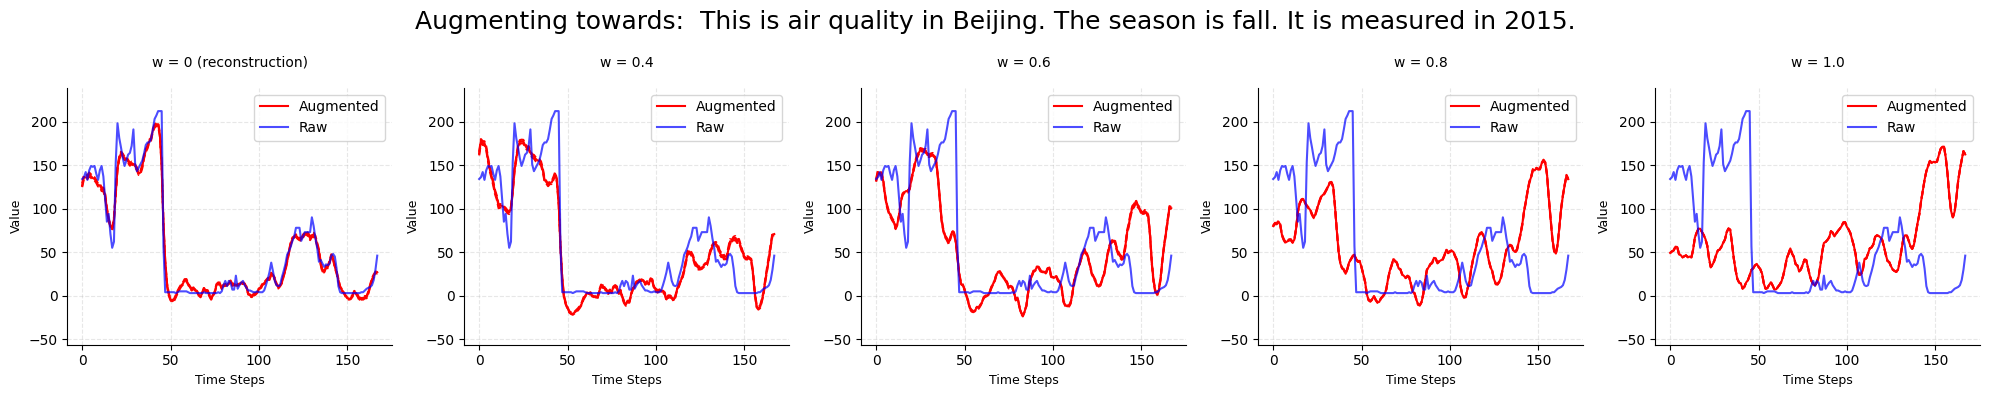

1    It is measured in 2013.
Name: year_str, dtype: object


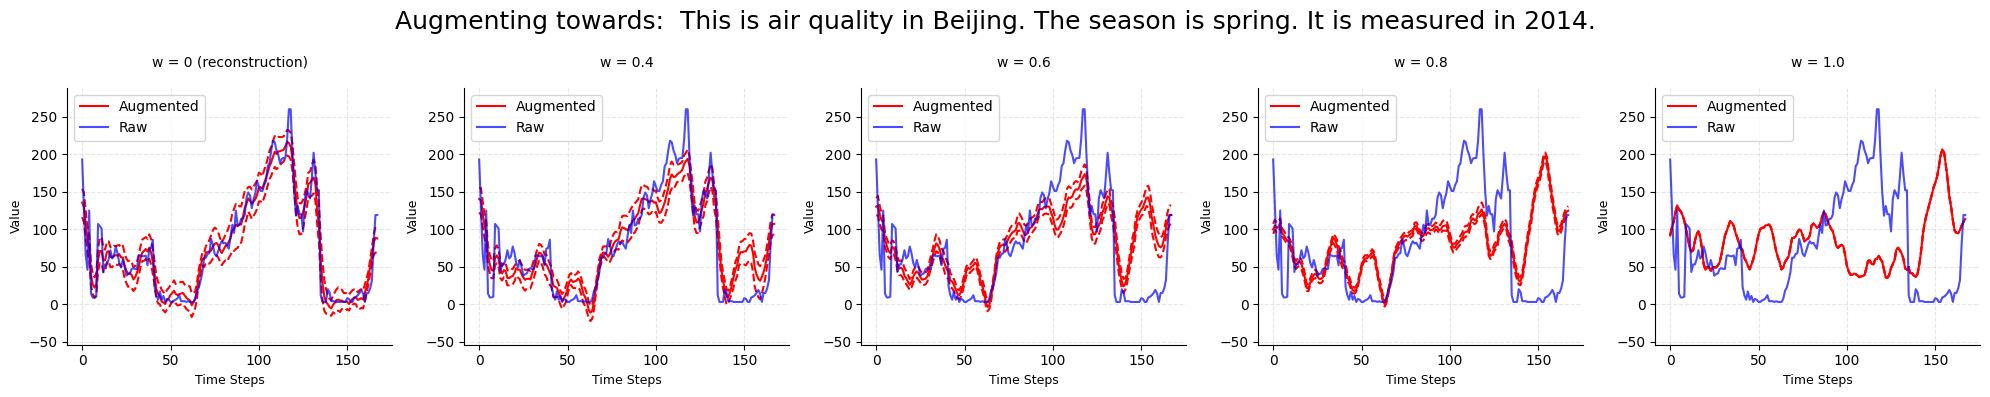

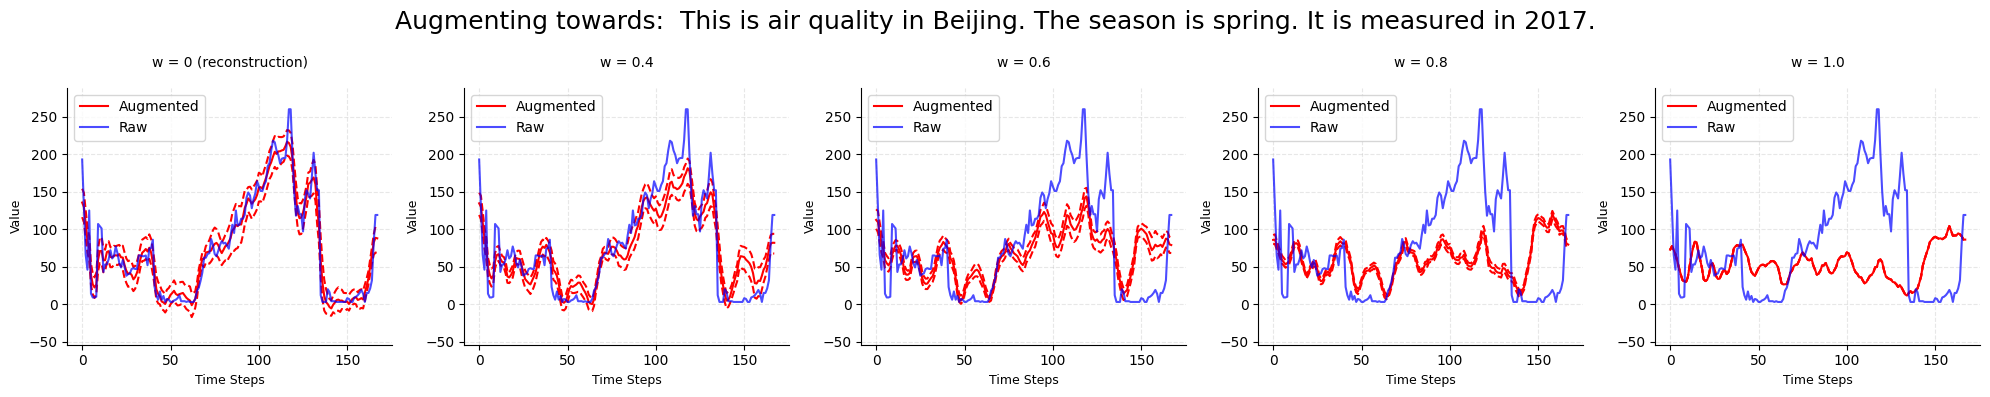

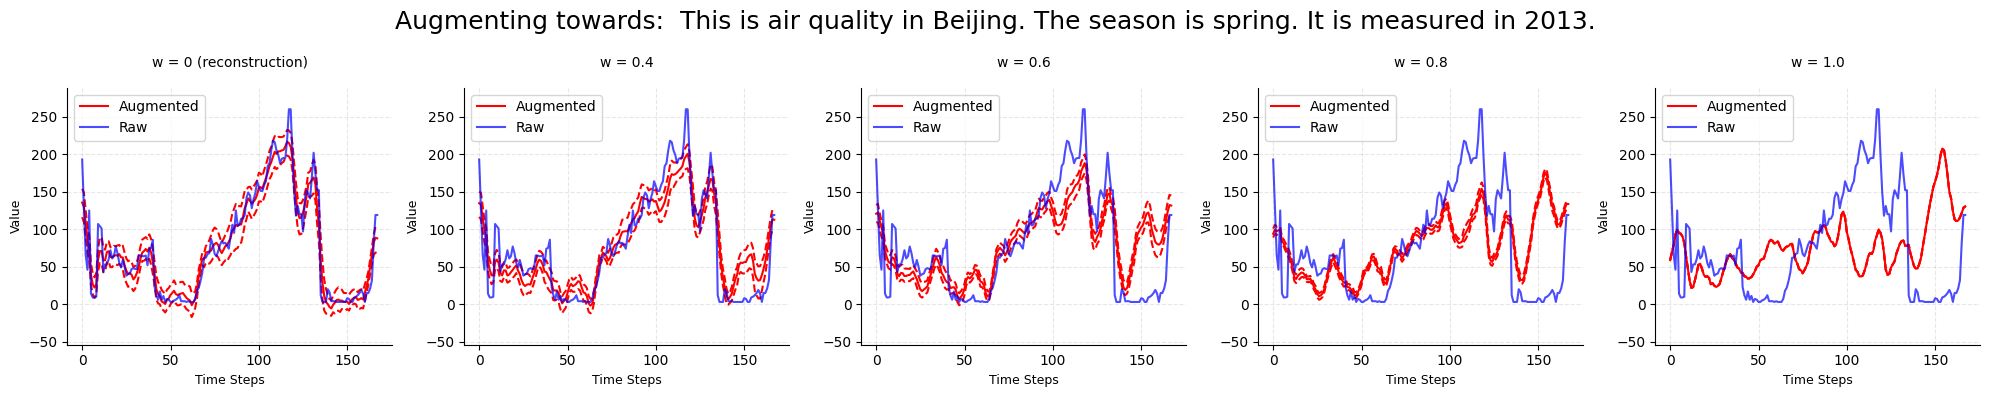

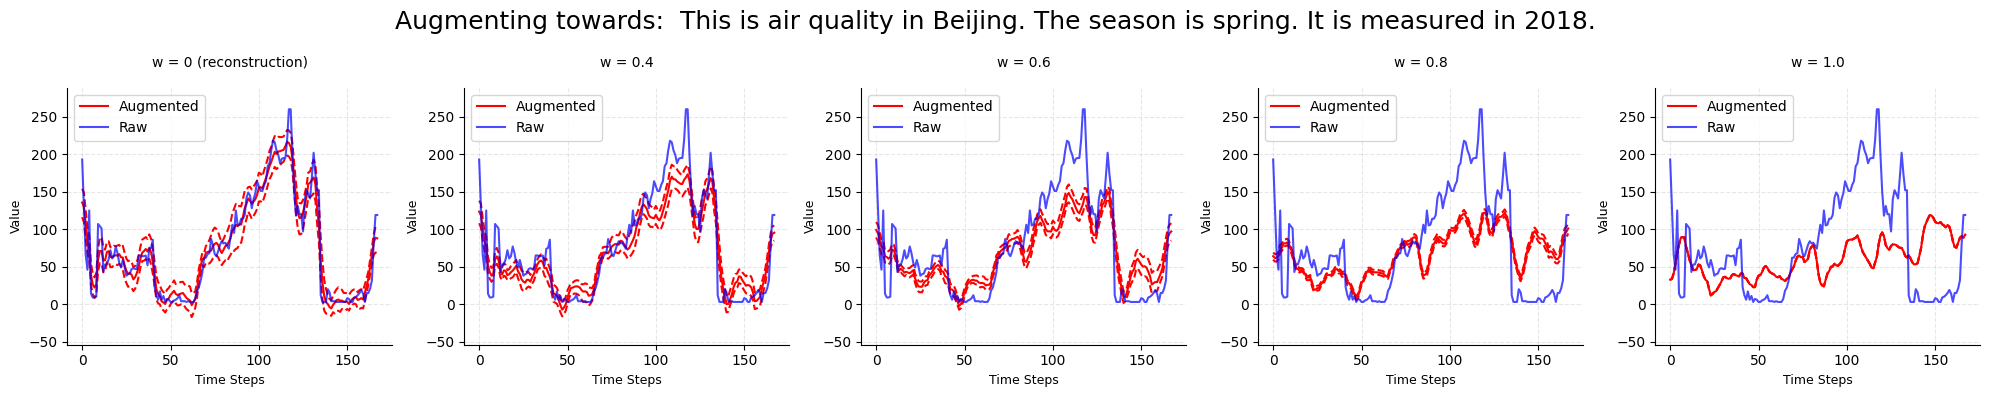

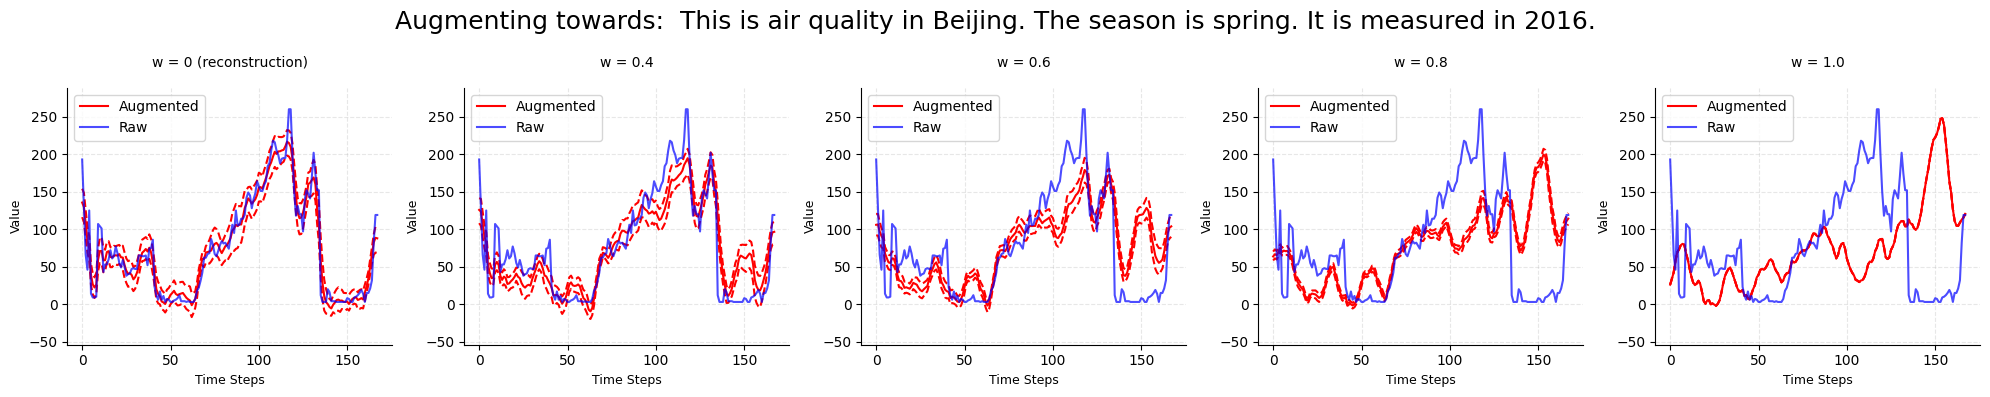

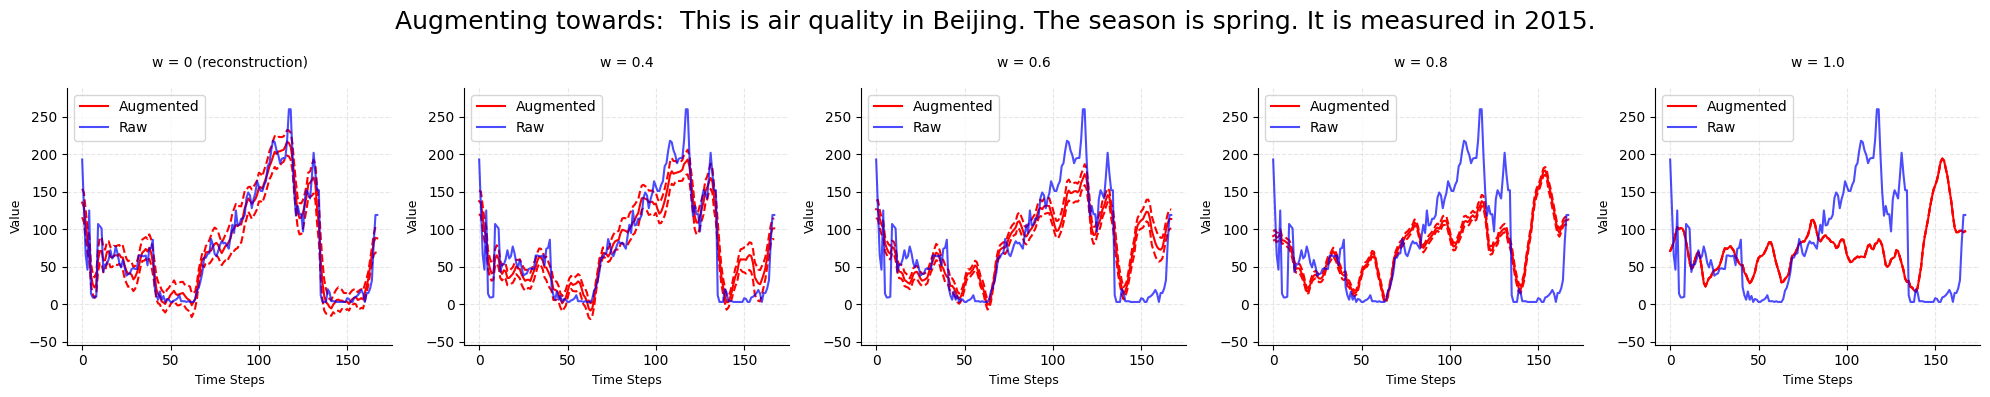

1    It is measured in 2018.
Name: year_str, dtype: object


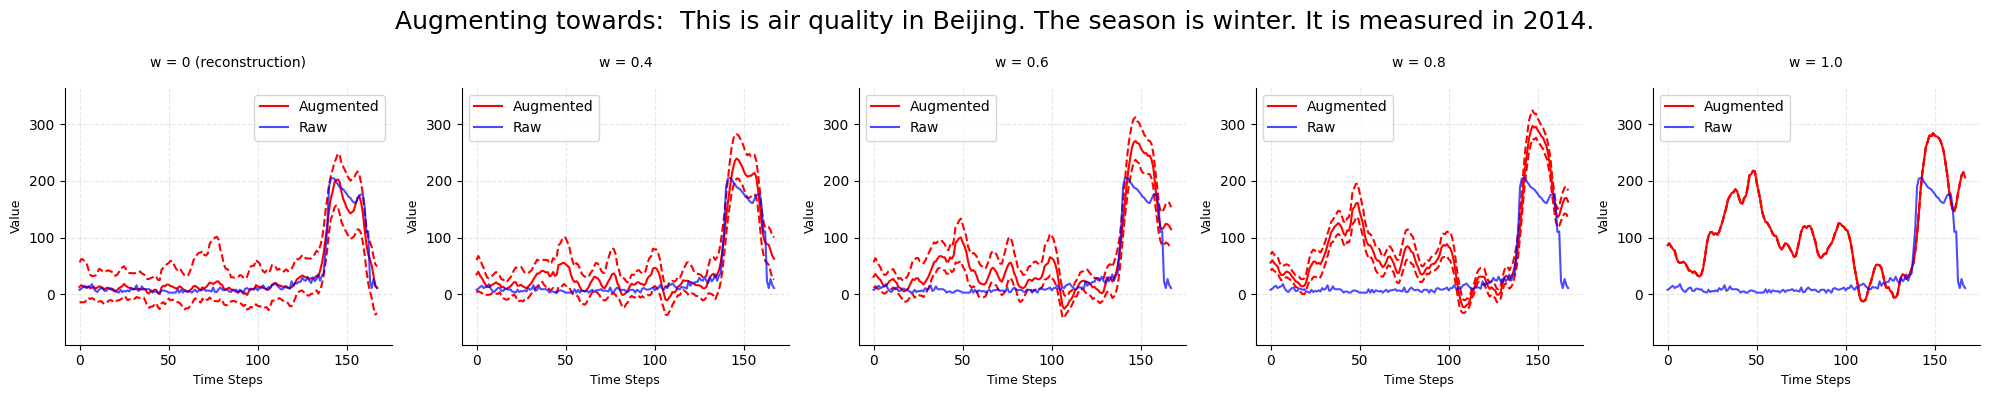

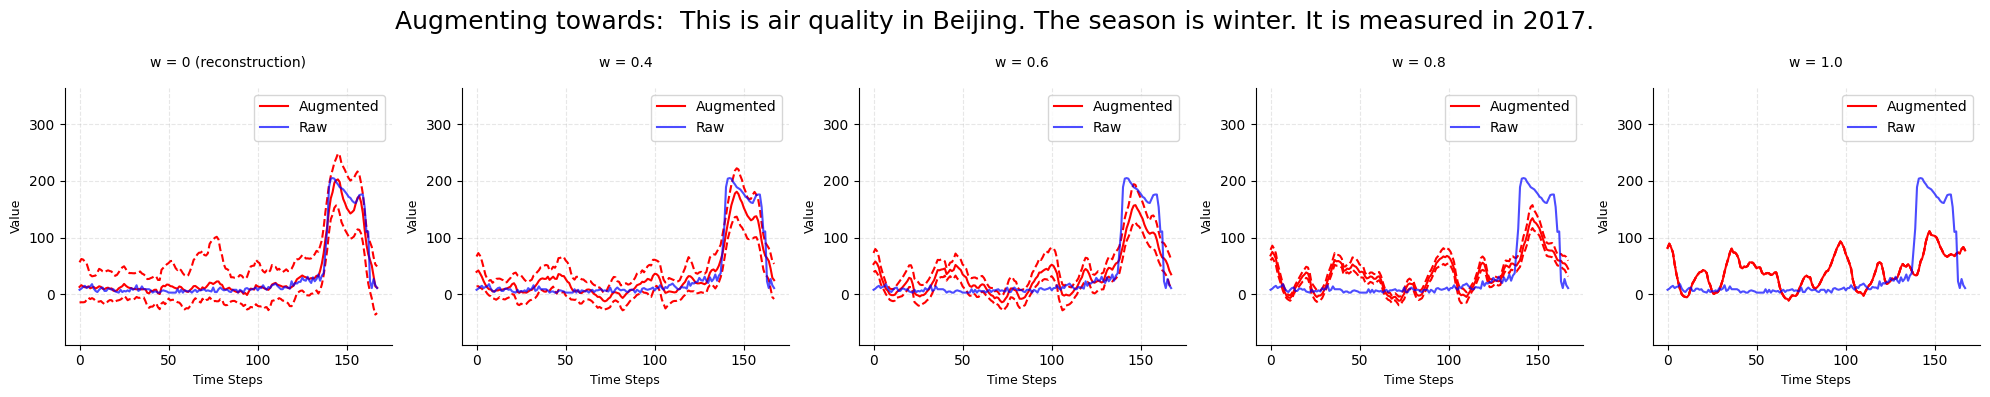

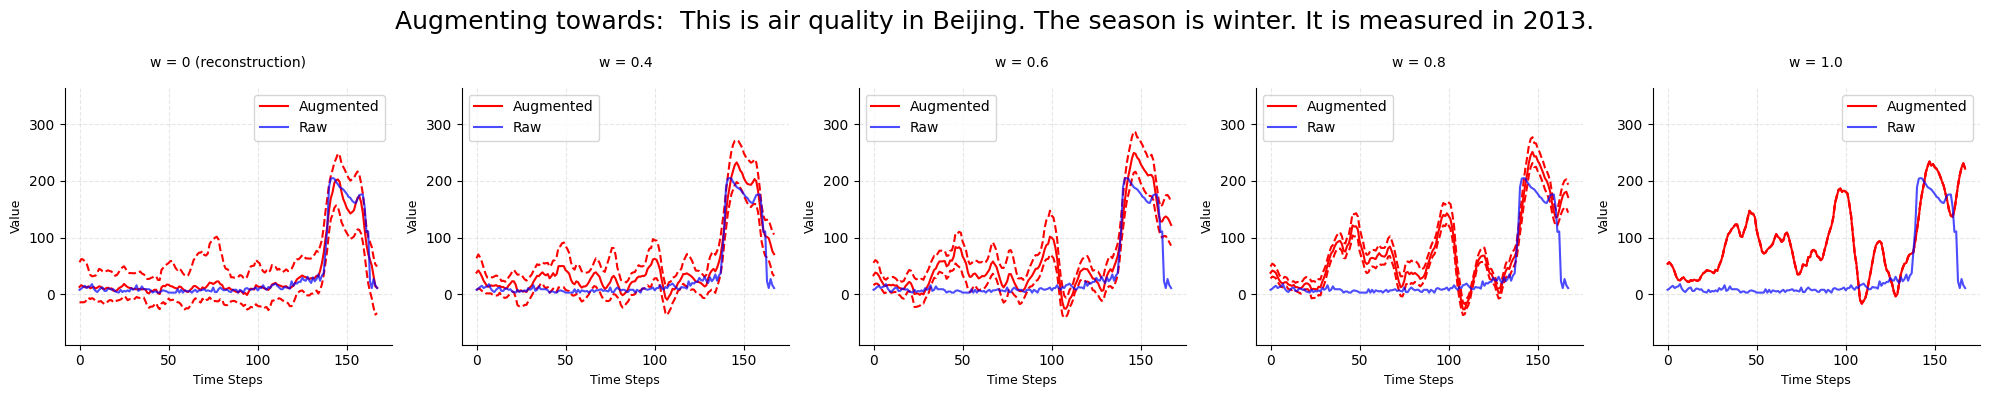

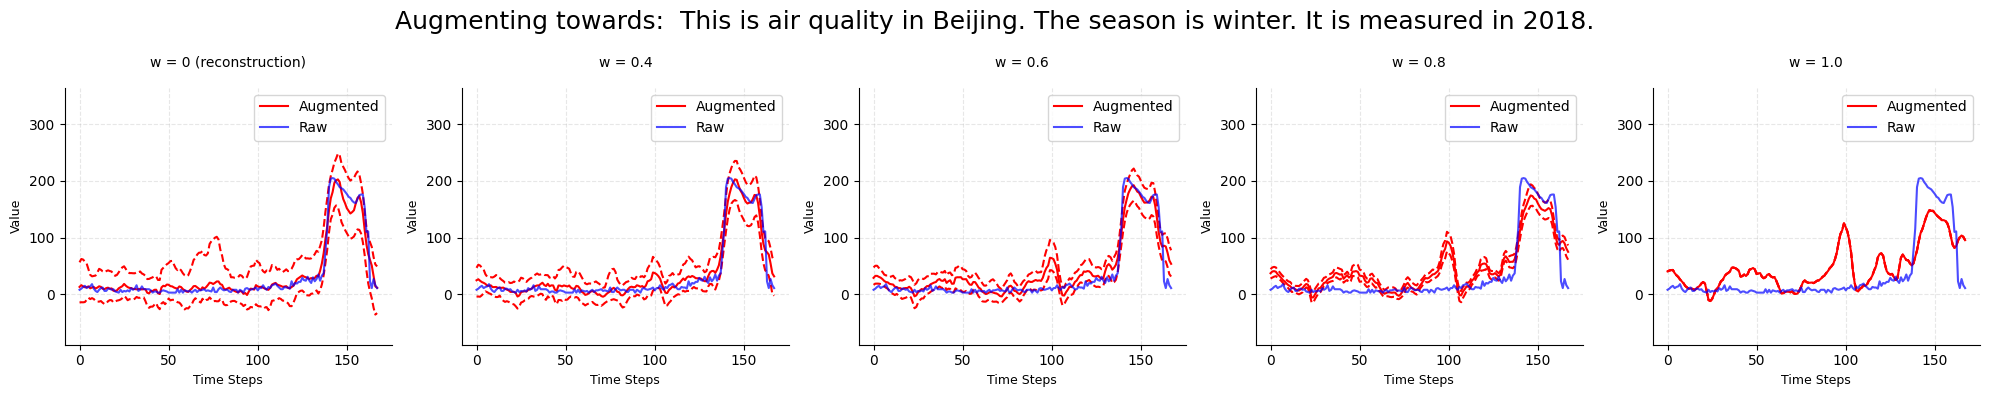

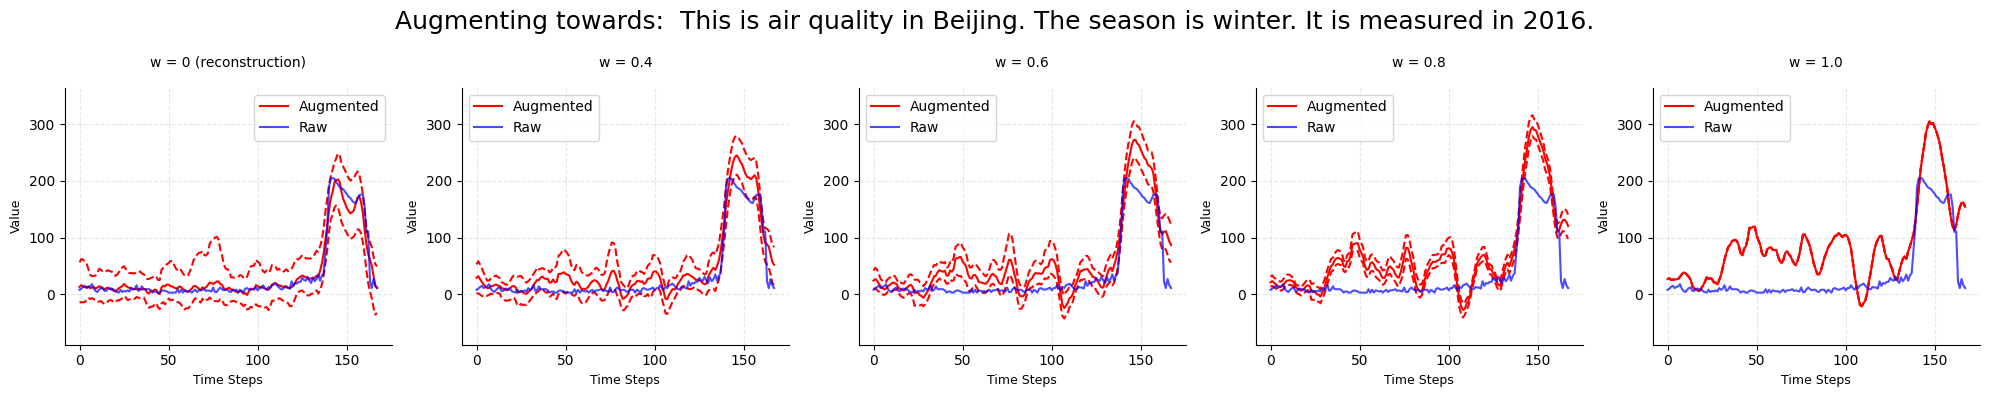

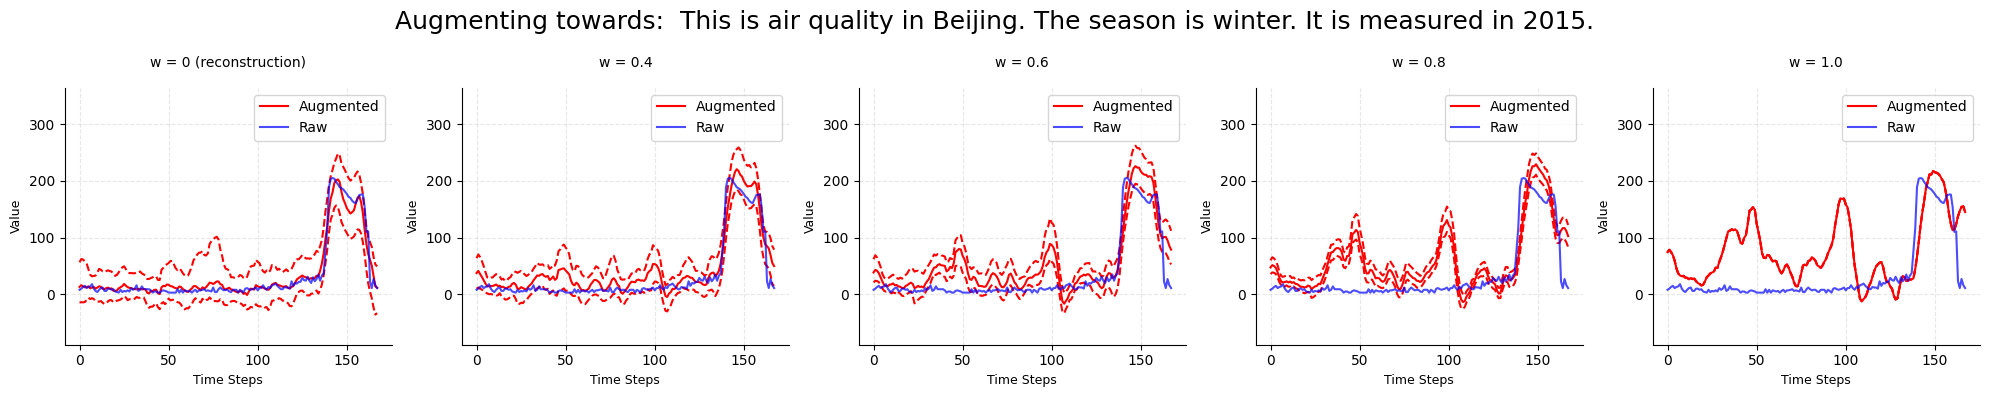

1    It is measured in 2016.
Name: year_str, dtype: object


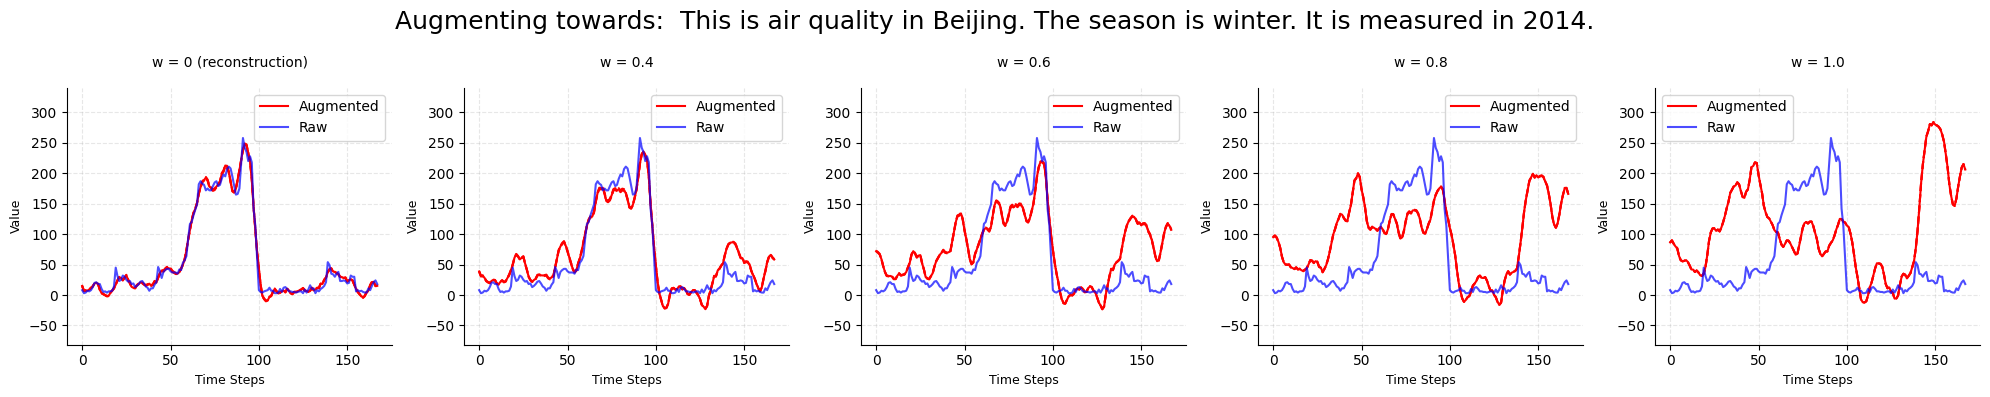

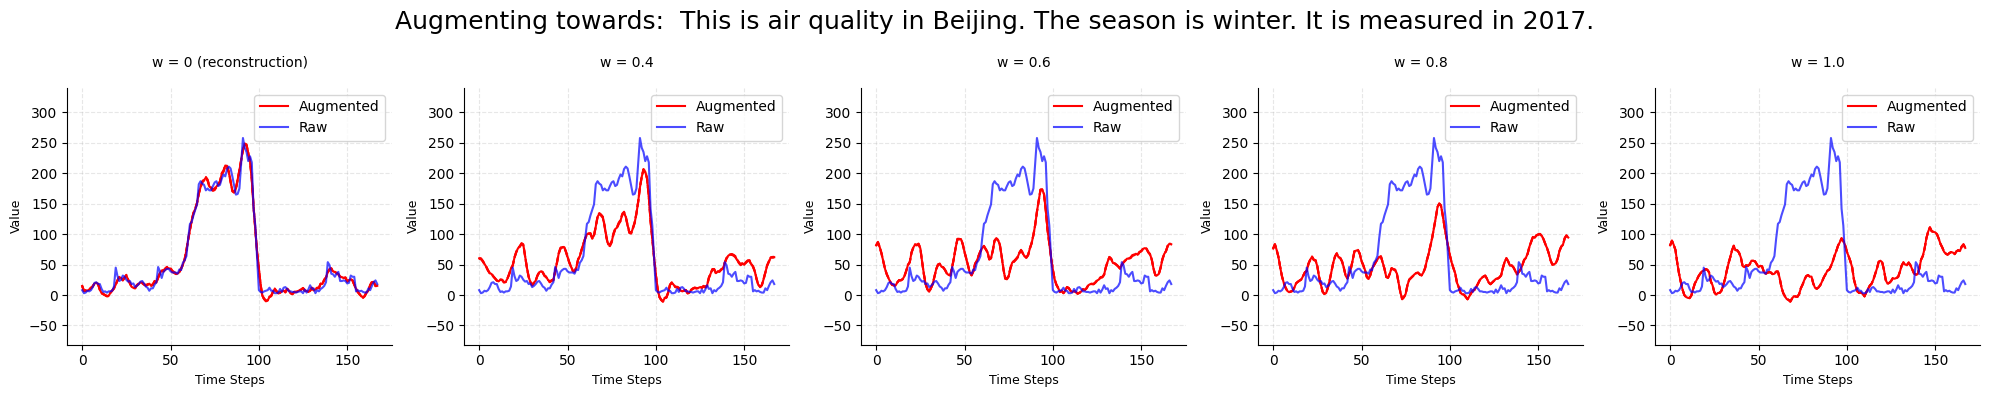

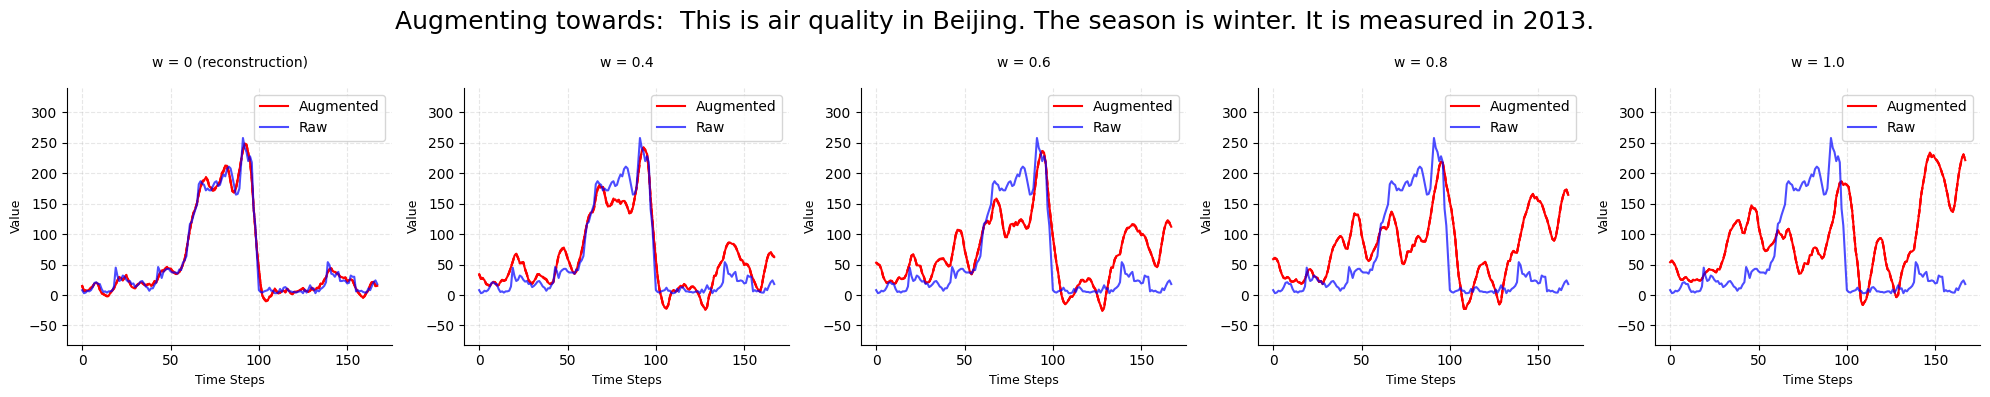

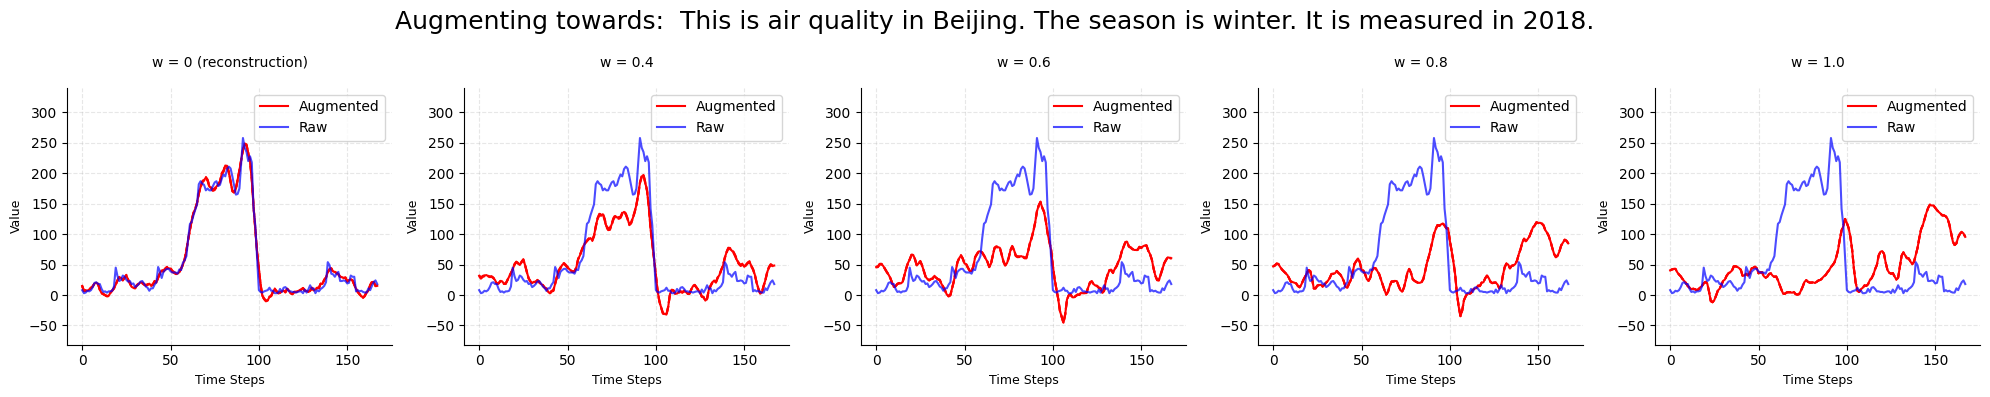

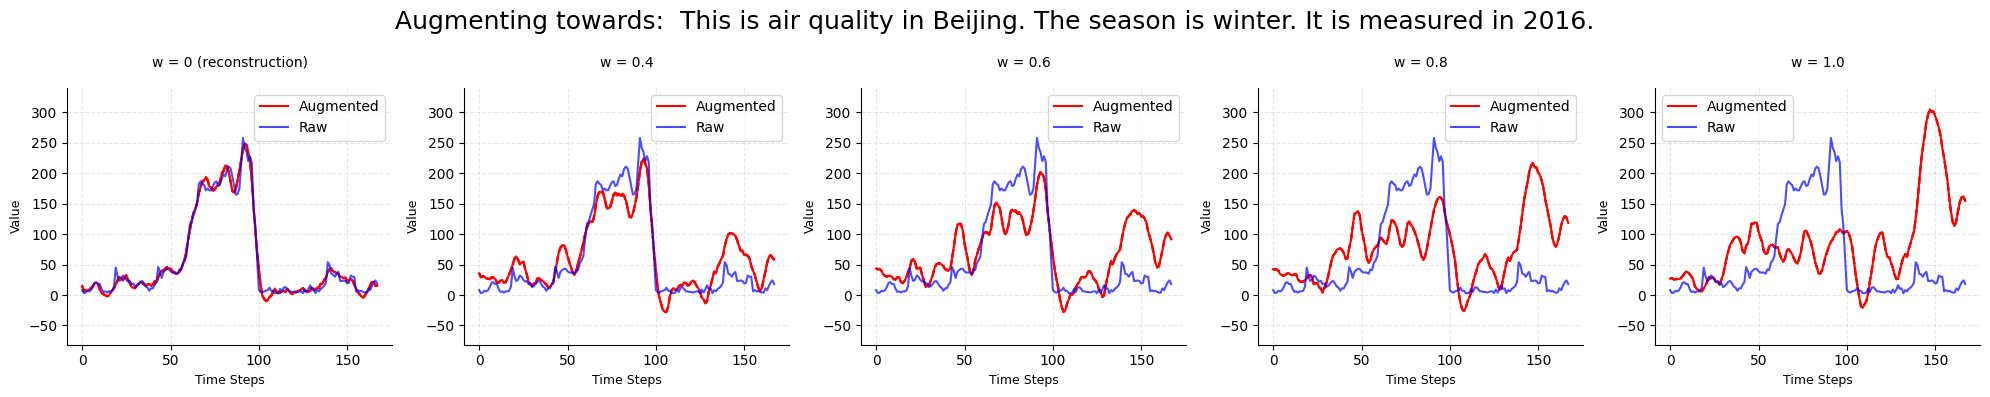

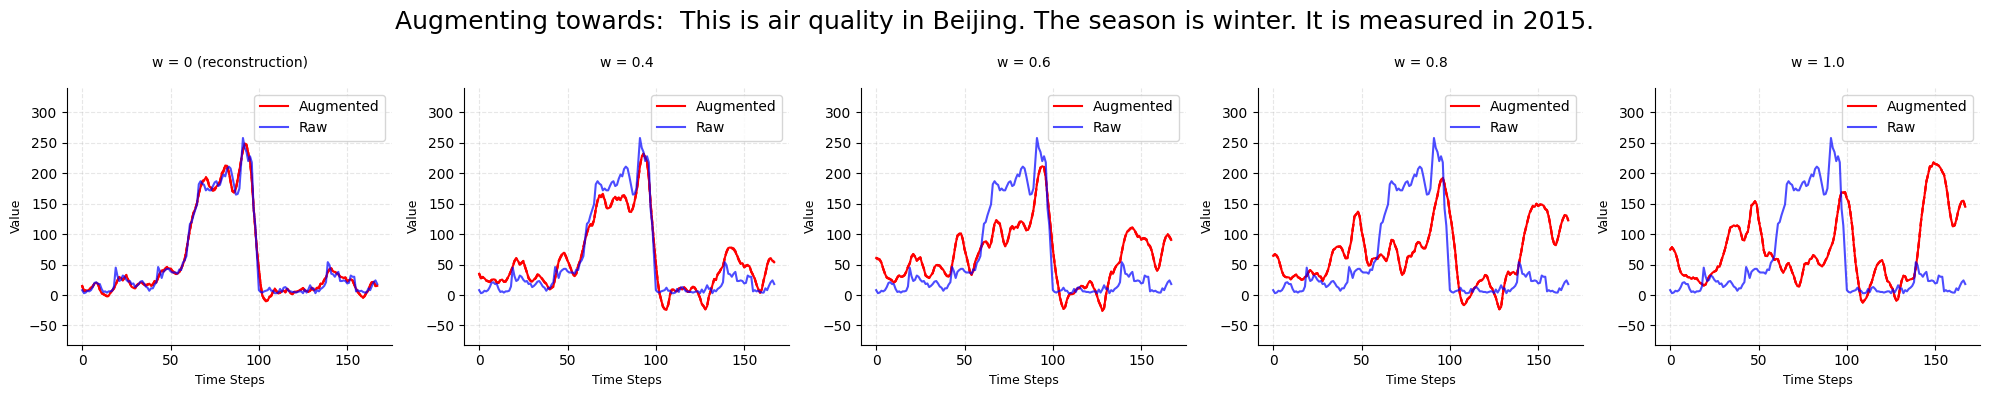

1    It is measured in 2015.
Name: year_str, dtype: object


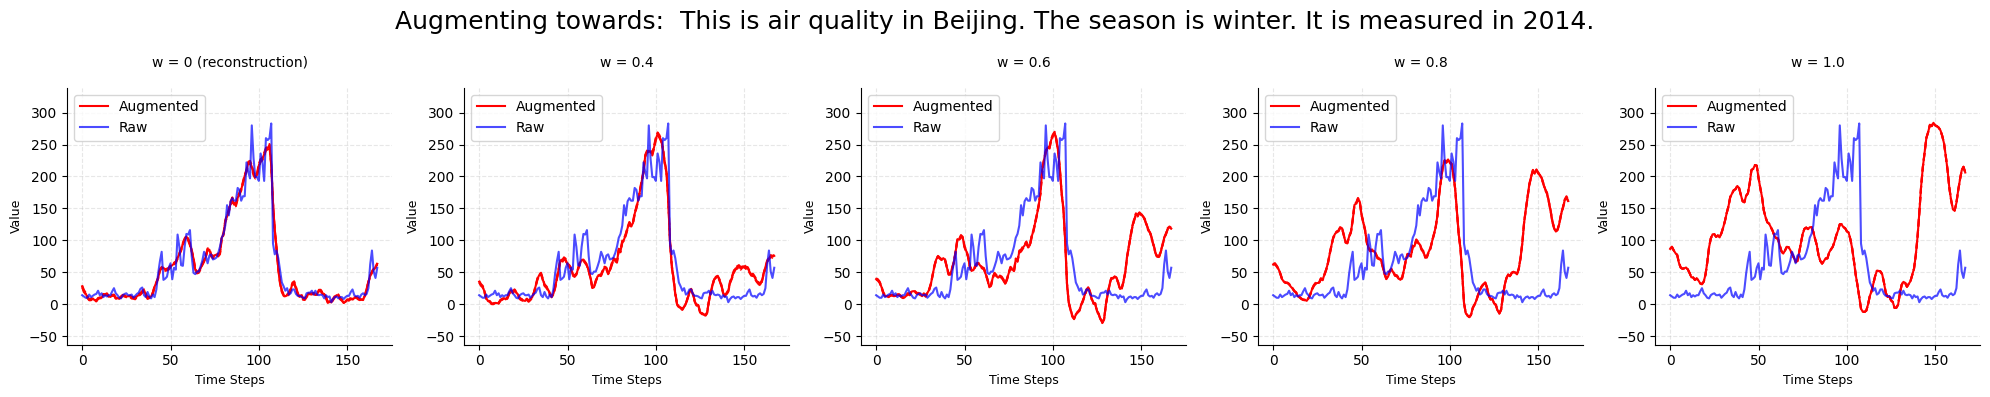

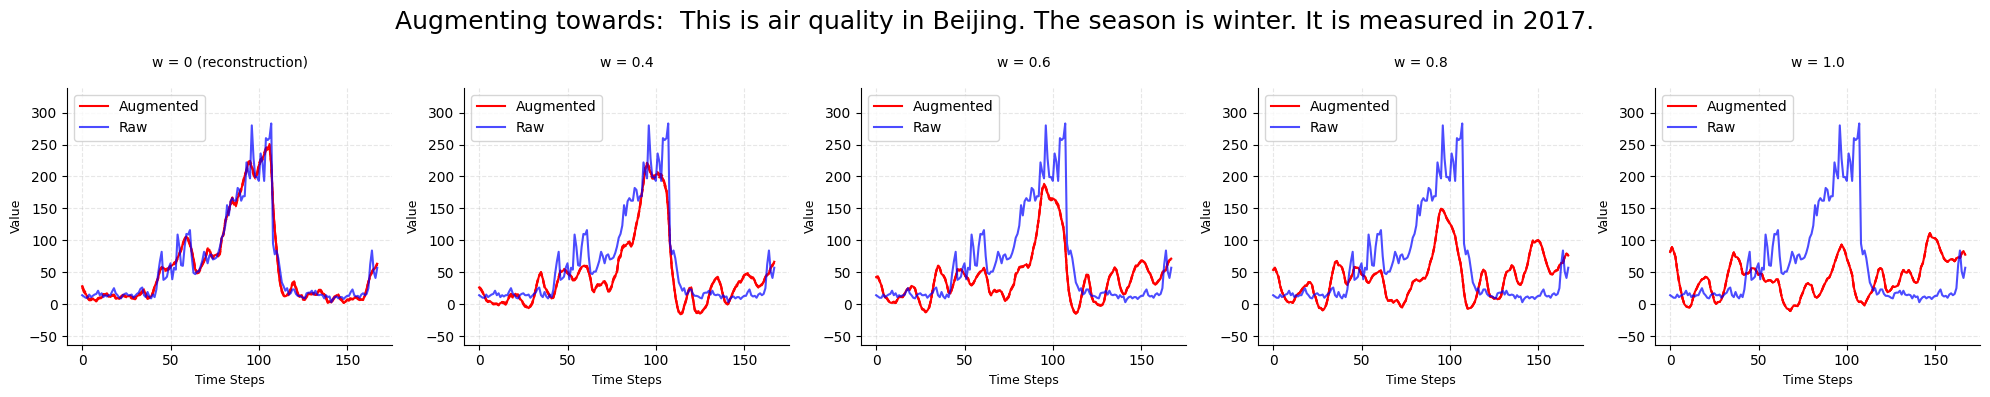

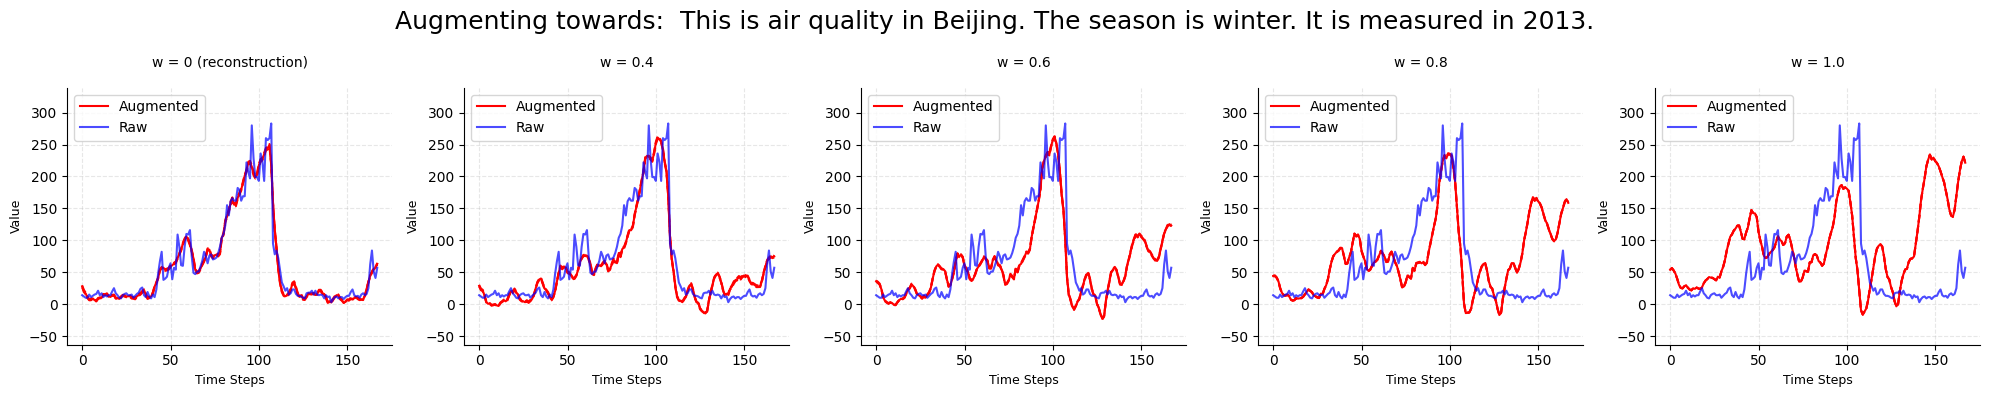

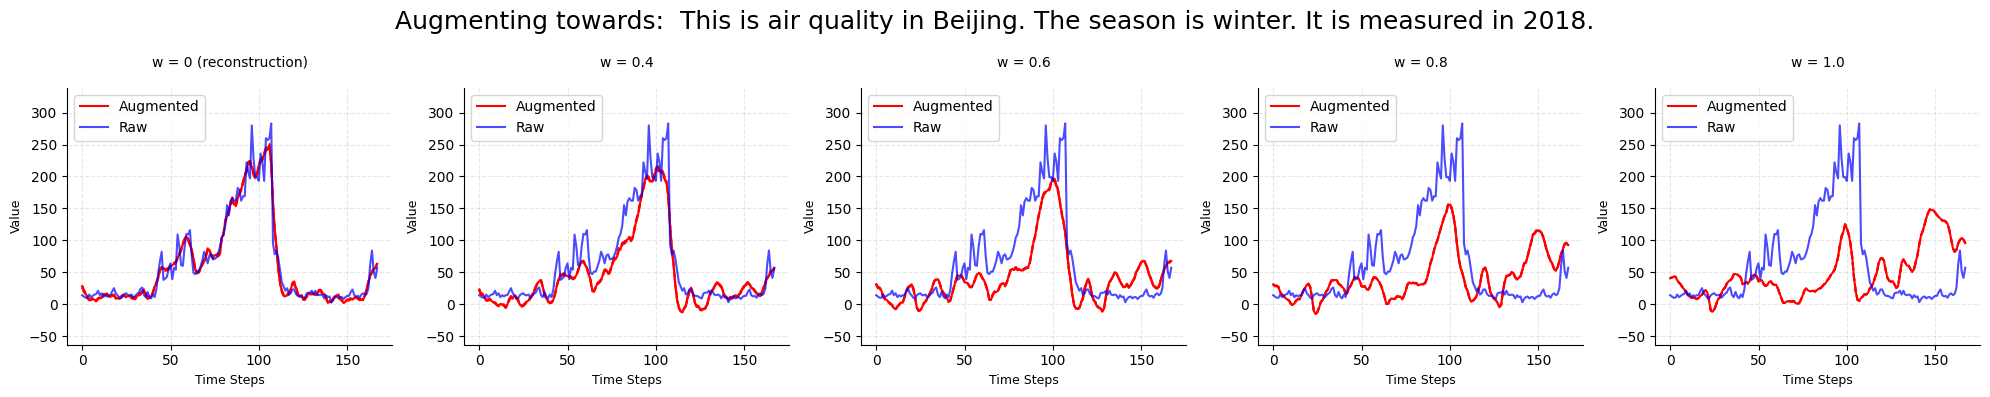

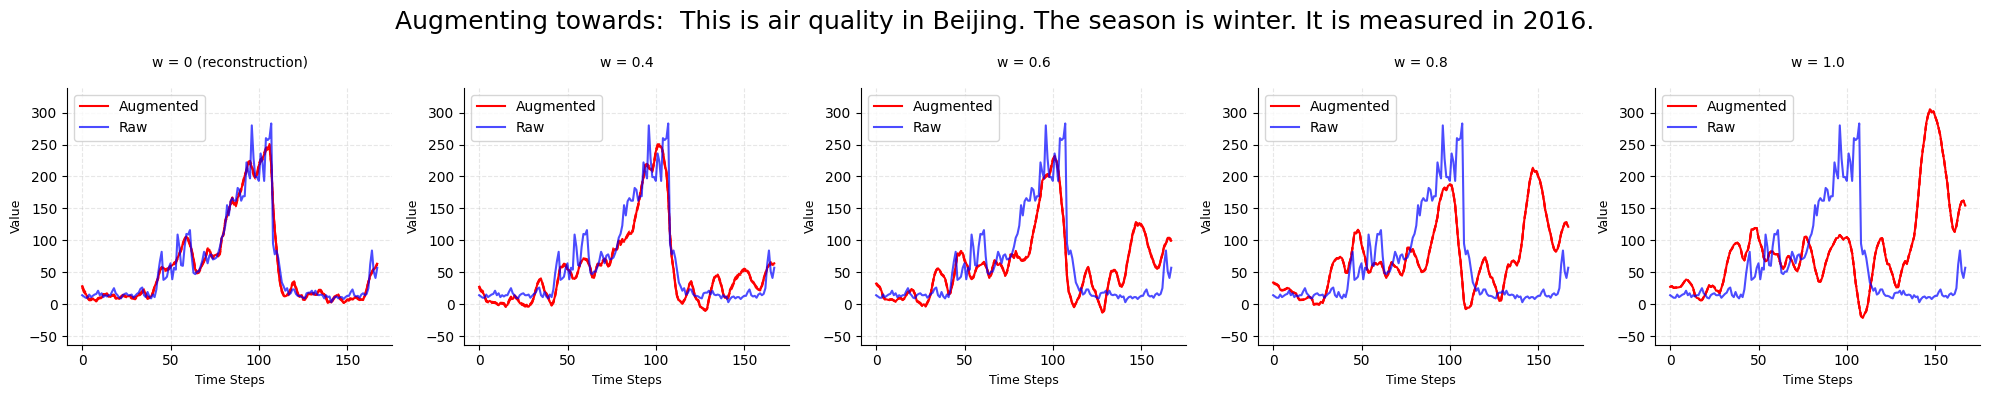

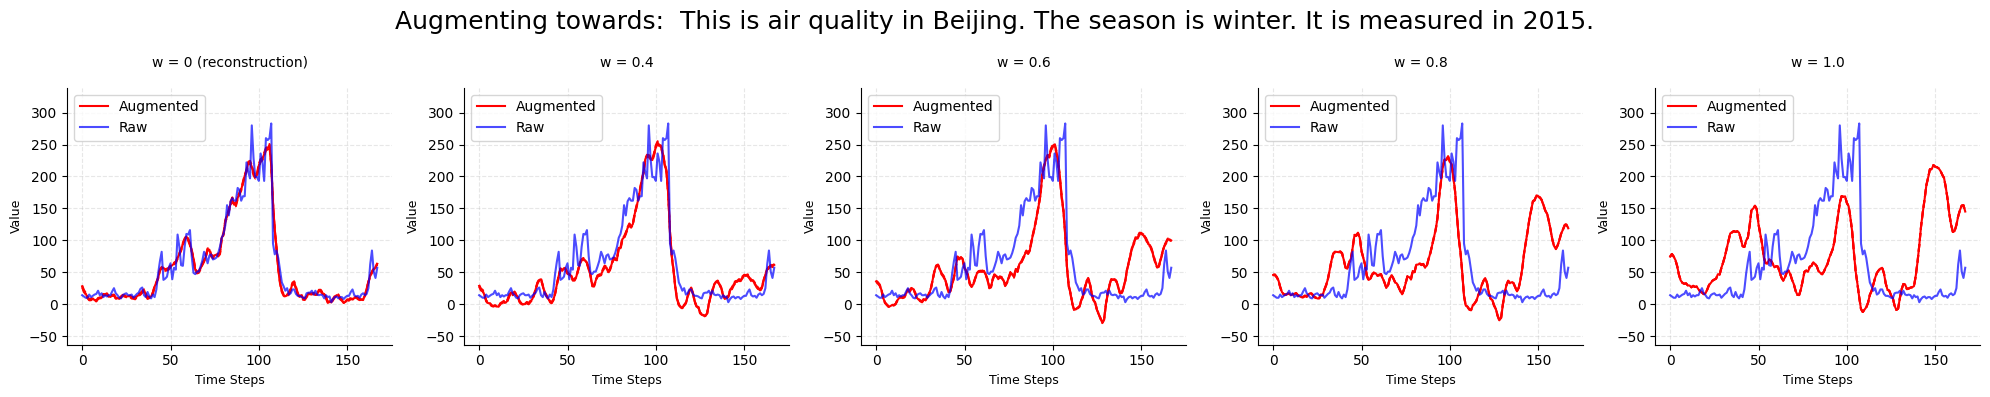

In [6]:
tid=1
# viz_generation_marginal(df_train, model, config_dict, tid=tid)
viz_generation_conditional(df_train, model, config_dict, tid=tid, sampling=True, b=100, ep=200)

# Eval

In [7]:
with open('run/eval.py', 'r') as file:
    exec(file.read())

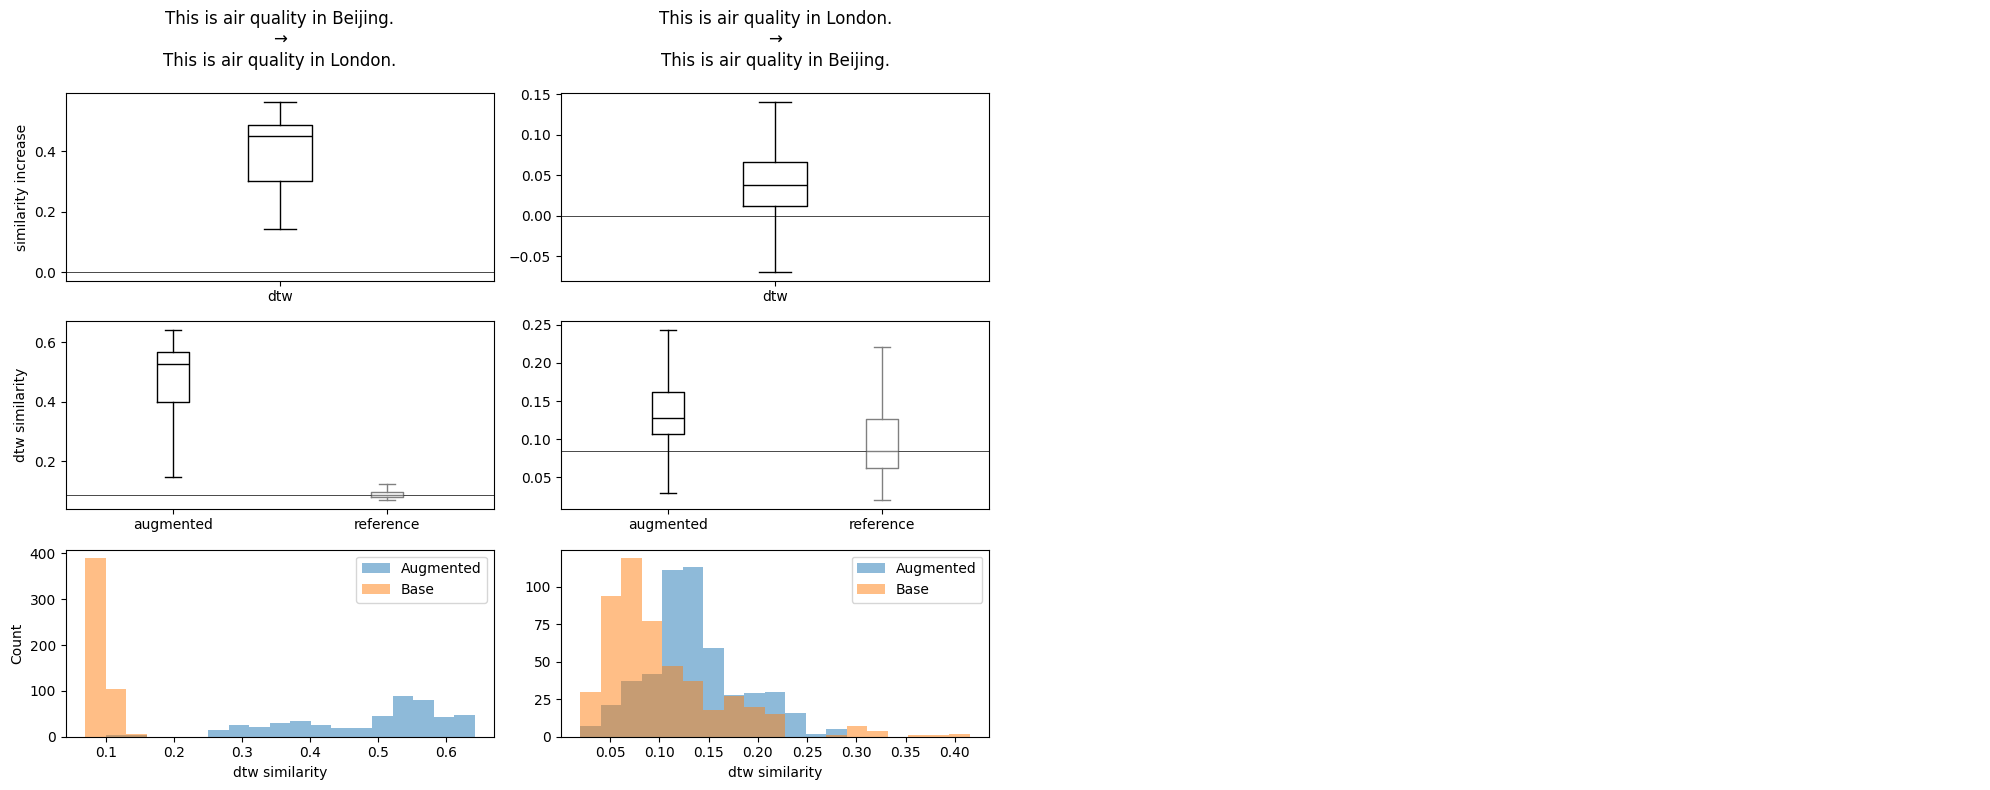

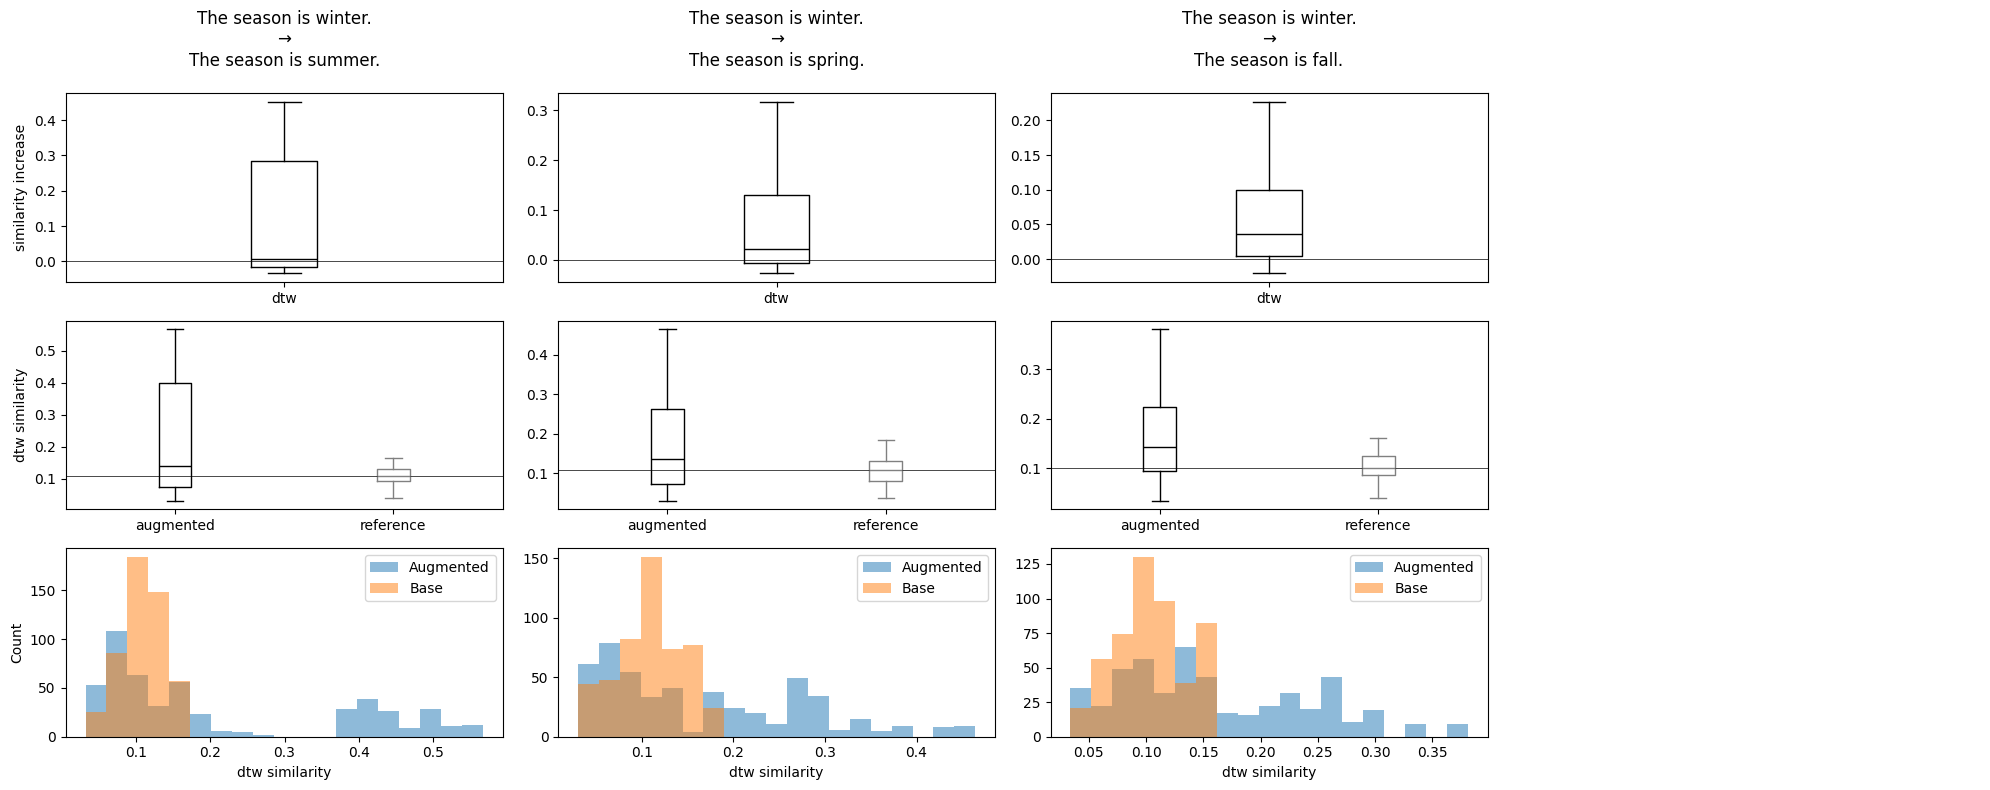

--------------------------------------------------------------------------------


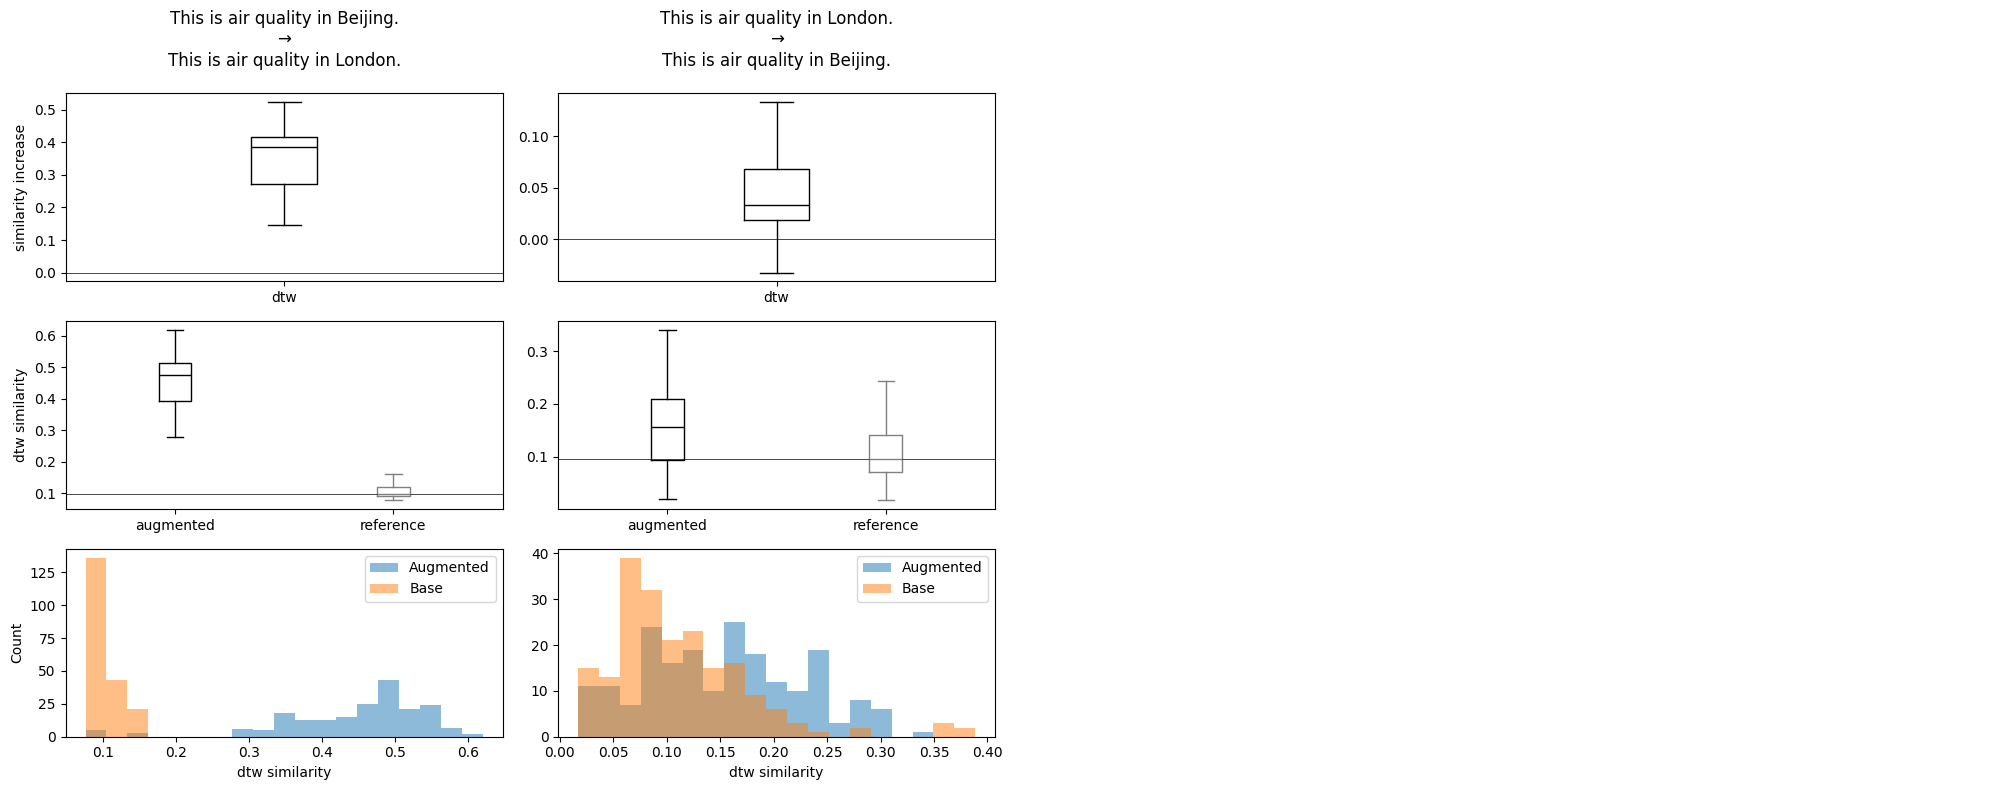

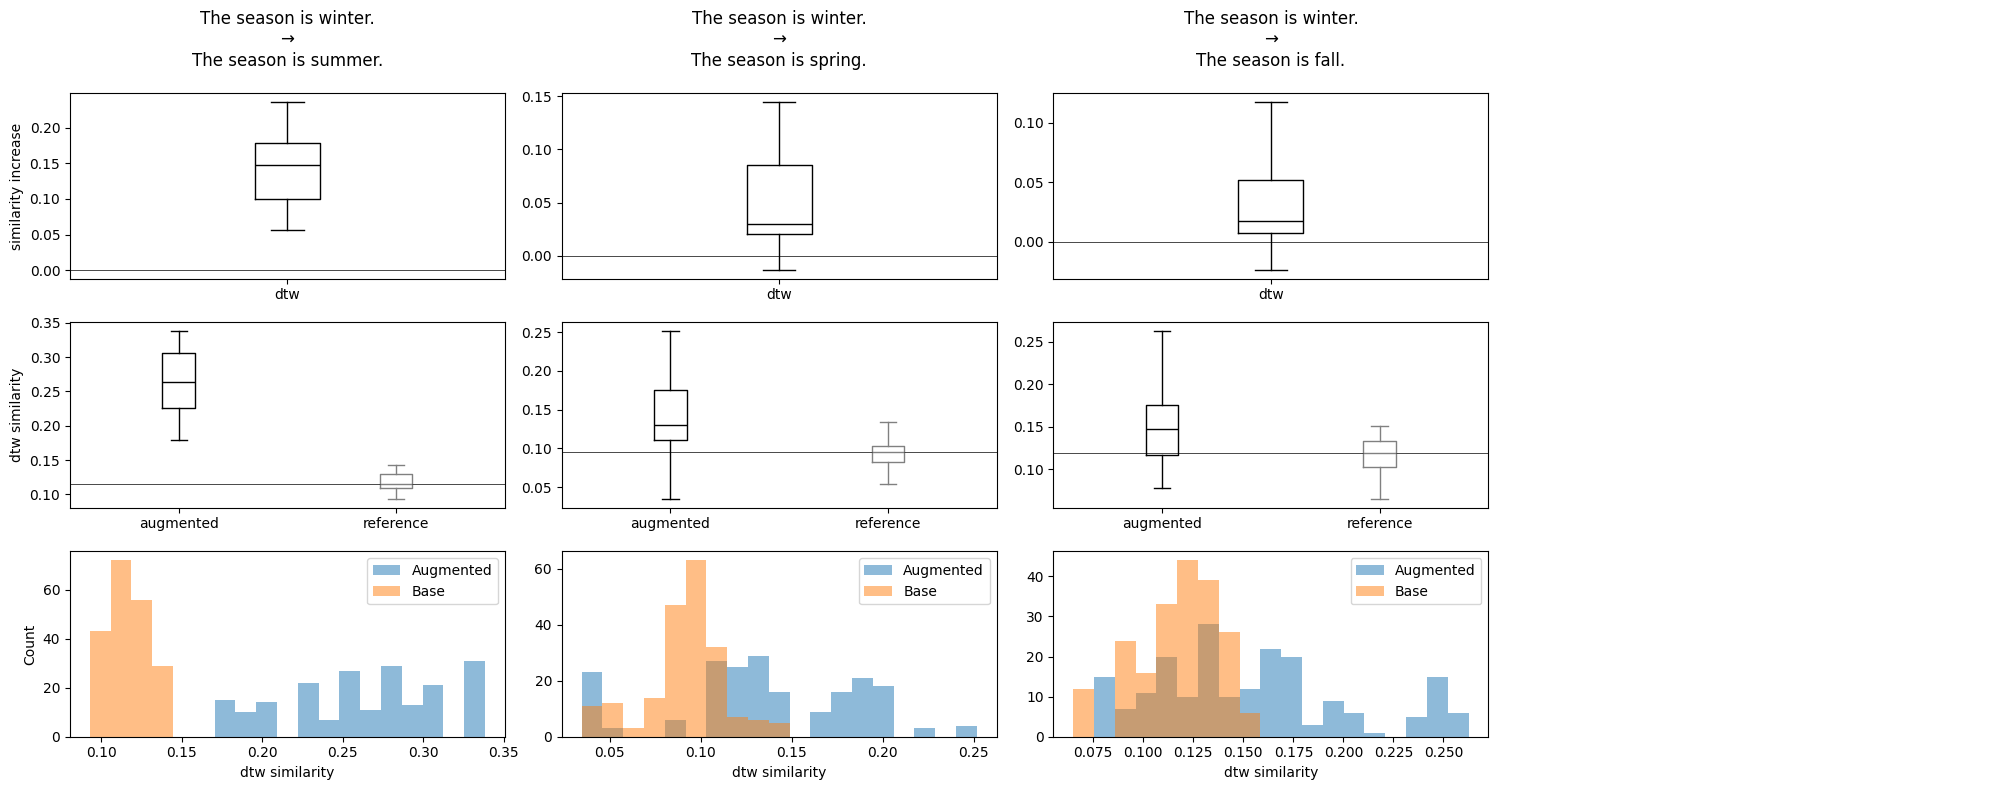

--------------------------------------------------------------------------------


In [8]:
# Define the base augmentation pairs
df_dists_raw = df_dists_ls[0]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae', , 'lcss'
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='marginal')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_margi = df_dists
print('-'*80)

# Define the base augmentation pairs
df_dists_raw = df_dists_ls[1]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae',, 'lcss' 
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='conditional')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_condi = df_dists
print('-'*80)

df_dists_all = pd.concat([df_dists_margi, df_dists_condi], ignore_index=True)

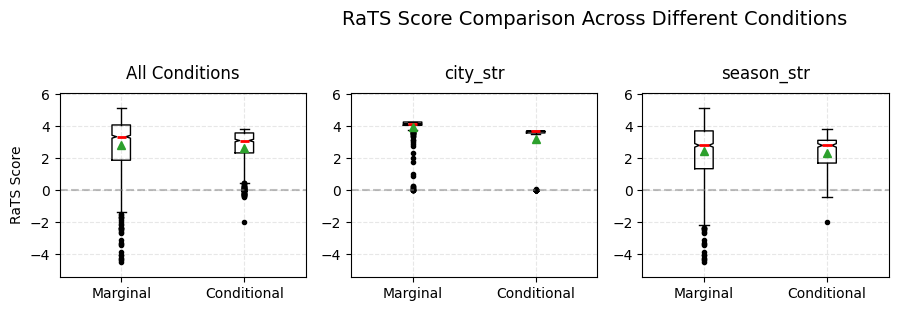

In [10]:
df_rats_margi = df_rats_ls[0]
df_rats_margi = df_rats_margi[df_rats_margi['aug_type'] == 'marginal']
df_rats_condi = df_rats_ls[1]
df_rats_condi = df_rats_condi[df_rats_condi['aug_type'] == 'conditional']
df_rats_all = pd.concat([df_rats_margi, df_rats_condi], ignore_index=True)

df_rats_all.dropna(inplace=True)
fig = plot_rats(df_rats_all, figsize=(12, 3))
plt.show()
